#Loading the dataset

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error, r2_score
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.models import Sequential

from sklearn.feature_selection import RFE, SelectFromModel

import datetime

In [ ]:
df = pd.read_csv('Mobile Prices Final Version.csv')

df.head()

,Brand Name,Mobile Name,Announced,Length (mm),Width (mm),Depth (mm),Weight (g),2G,3G,4G,...,Battery Removability,Supports Wireless Charging,Number of Colors Supported,Colors,Sim Type,Supports_eSIM,Area_cm2,Screen_to_Body_Ratio,Popularity (Hits in GSMArena),First Price
0,Nokia,9110i,1/1/1999,158.0,56.0,27.0,253.0,True,False,False,...,Removable,True,7,"Onyx Black, Marble Grey, Cobalt Violet, Amber ...",Dual Nano-SIM,True,94.4,0.9092,3748486,859.99
1,Nokia,9210i,1/1/2002,158.0,56.0,27.0,244.0,True,False,False,...,Removable,True,7,"Titanium Black, Titanium Gray, Titanium Violet...",Dual Nano-SIM,True,113.5,0.8852,7297753,1119.99
2,Nokia,7650,3/1/2002,114.0,56.0,26.0,154.0,True,False,False,...,Removable,False,2,"Black, Silver",Dual Nano-SIM,False,74.5,0.6972,1535210,152.73
3,Sony,Ericsson P800,9/1/2002,117.0,59.0,27.0,158.0,True,False,False,...,Removable,False,2,"Space Black, Gem Green",Dual Nano-SIM,False,103.4,0.8362,87312,803.98
4,Nokia,3650,3/1/2003,130.0,57.0,26.0,130.0,True,False,False,...,Removable,False,1,Black,Dual Nano-SIM,False,201.8,0.1808,2149909,2727.33


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand Name                     2326 non-null   object 
 1   Mobile Name                    2326 non-null   object 
 2   Announced                      2326 non-null   object 
 3   Length (mm)                    2326 non-null   float64
 4   Width (mm)                     2326 non-null   float64
 5   Depth (mm)                     2326 non-null   float64
 6   Weight (g)                     2326 non-null   float64
 7   2G                             2326 non-null   bool   
 8   3G                             2326 non-null   bool   
 9   4G                             2326 non-null   bool   
 10  5G                             2326 non-null   bool   
 11  Resolution Width (px)          2326 non-null   int64  
 12  Resolution Height (px)         2326 non-null   i

#Descriptive

In [ ]:
numeric_features = df.select_dtypes(include=['float64', 'int64'])
pd.set_option('display.float_format', lambda x: '%.3f' % x)
numeric_features.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Length (mm),2326.000,141.081,25.030,70.000,116.000,151.900,163.000,202.100
Width (mm),2326.000,67.631,12.533,41.700,59.000,73.000,75.700,144.900
Depth (mm),2326.000,10.576,3.906,0.000,8.100,8.900,12.000,29.000
Weight (g),2326.000,155.765,42.304,63.000,123.000,165.000,189.000,317.000
Resolution Width (px),2326.000,734.021,400.969,96.000,320.000,720.000,1080.000,3840.000
Resolution Height (px),2326.000,1459.150,903.469,68.000,480.000,1560.000,2400.000,3840.000
PPI,2326.000,297.548,114.088,51.000,200.000,282.000,401.000,807.000
screen size (Inches),2326.000,4.946,1.810,1.400,3.200,5.500,6.520,8.030
Main Camera (Megapixels),2326.000,23.708,26.197,0.000,3.200,13.000,50.000,200.000
CPU Core Count,2326.000,5.139,3.112,1.000,1.000,8.000,8.000,10.000


In [ ]:
apple = df[df['Brand Name'] == 'Apple']
apple['OS']

,OS
141,Android
270,Android
350,Android
439,Android
464,Android
526,Android
611,Android
714,Android
715,Android
841,Symbian


In [ ]:
brand_counts = df['Brand Name'].value_counts()
wdc_counts = df[['2G', '3G', '4G', '5G']].sum()
OS_counts = df['OS'].value_counts()
Chipset_counts = df['Chipset'].value_counts()
GPU_counts = df['GPU'].value_counts()
MemoryType_counts = df['Memory Type'].value_counts()
Speaker_counts = df[['Has Speaker', 'Stereo Speakers', 'Dolby Atmos', 'Dedicated Amplifiers']].sum()
WiFiStandards_counts = df['WiFi Standards'].value_counts()
Wifi_counts = df[['Has WiFi', 'Dual-Band', 'Hotspot', 'WiFi Direct', 'DLNA']].sum()
Bluetooth_counts = df[['Has Bluetooth', 'Bluetooth Supports A2DP', 'Bluetooth Supports EDR', 'Bluetooth Supports LE', 'Bluetooth Supports aptX']].sum()
GPS_counts = df[['Has GPS', 'Supports A-GPS', 'GPS Supports GLONASS', 'GPS Supports GALILEO', 'GPS Supports BDS', 'GPS Supports QZSS']].sum()
NFC_counts = df[['Has NFC', 'NFC Region or Model Specific', 'NFC Payment Capabilities', 'NFC Optional or Conditional']].sum()
Functionality_counts = df[['Has Radio', 'Has Sensors', 'Accelerometer', 'Gyro', 'Proximity', 'Compass', 'Fingerprint Sensor', 'Barometer', 'Color Spectrum Sensor', 'Face ID', 'Iris Scanner']].sum()
USBtype_counts = df['USB Type'].value_counts()
BatteryComposition_counts = df['Battery Composition'].value_counts()
BatteryRemovability_counts = df['Battery Removability'].value_counts()
WirelessCharging_counts = df['Supports Wireless Charging'].sum()
SimType_counts = df['Sim Type'].value_counts()
Supports_eSIM_counts = df['Supports_eSIM'].sum()

print("\nBrand Counts:")
print(brand_counts)

print("\nOS Counts:")
print(OS_counts)

print("\n Chipset Counts:")
print(Chipset_counts)

print("\n GPU Counts:")
print(GPU_counts)

print("\n Memory Type Counts:")
print(MemoryType_counts)

print("\n WiFi Standards Counts:")
print(WiFiStandards_counts)

print("\n USB type Counts:")
print(USBtype_counts)

print("\n Battery Composition Counts:")
print(BatteryComposition_counts)

print("\n Battery Removability Counts:")
print(BatteryRemovability_counts)

print("\n Sim Type Counts:")
print(SimType_counts)

print("\nwdc Counts:")
print(wdc_counts)

print("\nSpeaker counts:")
print(Speaker_counts)

print("\nWifi counts:")
print(Wifi_counts)

print("\nBluetooth counts:")
print(Bluetooth_counts)

print("\nGPS counts:")
print(GPS_counts)

print("\nNFC counts:")
print(NFC_counts)

print("\nFunctionality counts:")
print(Functionality_counts)

print("\nWireless Charging counts:")
print(WirelessCharging_counts)

print("\nSupports_eSIM counts:")
print(Supports_eSIM_counts)


Brand Counts:
Brand Name
Nokia        468
Sony         278
Oppo         275
Xiaomi       252
alcatel      227
vivo         223
Realme       169
Allview      119
Samsung       76
Asus          71
Acer          66
Apple         43
Archos        37
Microsoft     21
Amazon         1
Name: count, dtype: int64

OS Counts:
OS
Android          1625
Vendor            416
Symbian           136
Windows Phone      79
Other              67
MeeGo               2
Nokia Belle         1
Name: count, dtype: int64

 Chipset Counts:
Chipset
Qualcomm    874
Mediatek    693
Unknown     601
Other       131
Exynos       22
NovaThor      4
Intel         1
Name: count, dtype: int64

 GPU Counts:
GPU
Adreno       870
Unknown      618
Mali         556
PowerVR      203
Other         43
Apple GPU     27
Broadcom       8
Xclipse        1
Name: count, dtype: int64

 Memory Type Counts:
Memory Type
microSDXC                  957
No                         624
microSDHC                  525
Other                      

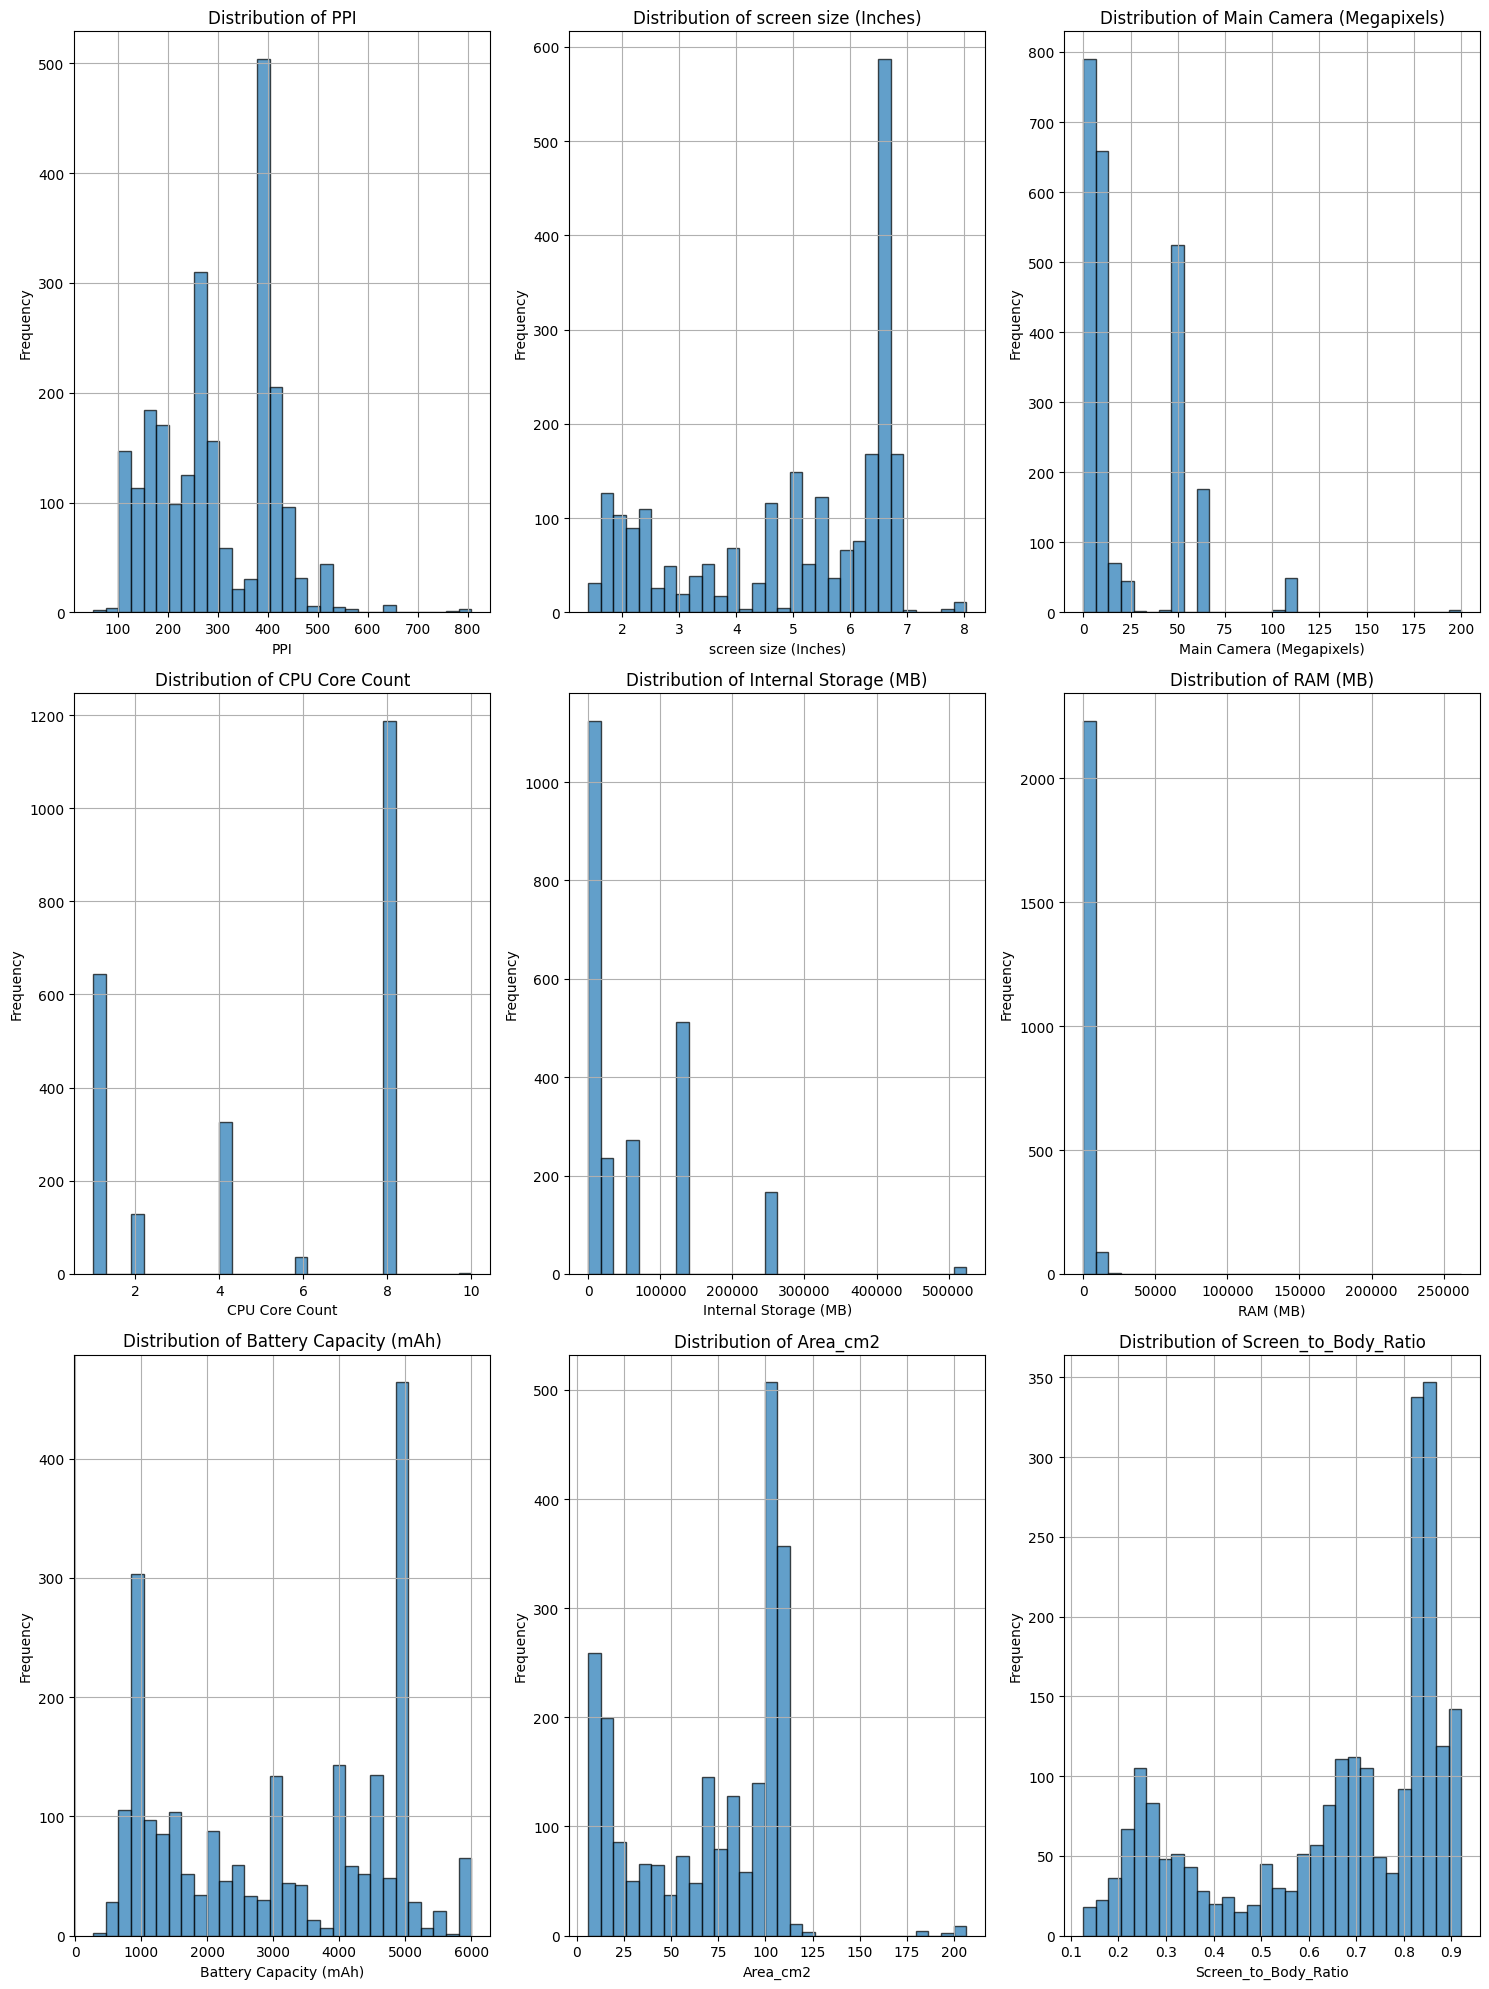

In [ ]:
features = [
    'PPI',
    'screen size (Inches)',
    'Main Camera (Megapixels)',
    'CPU Core Count',
    'Internal Storage (MB)',
    'RAM (MB)',
    'Battery Capacity (mAh)',
    'Area_cm2',
    'Screen_to_Body_Ratio'
]

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.hist(df[feature], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.grid(True)

plt.tight_layout()
plt.show()

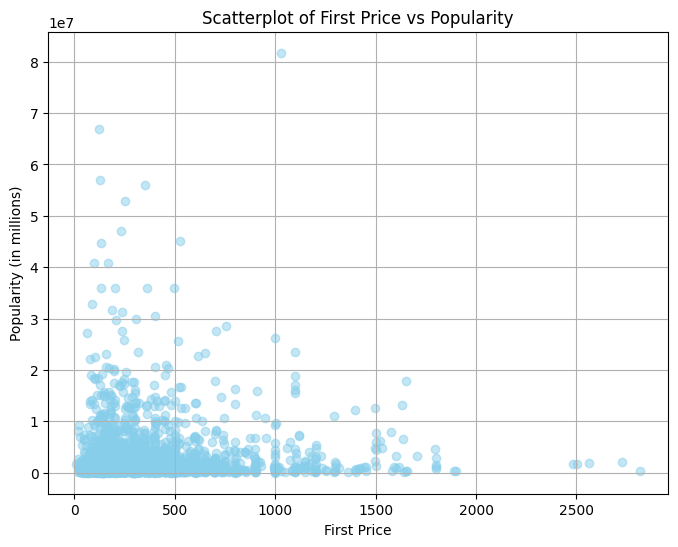

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(df['First Price'],df['Popularity (Hits in GSMArena)'], color='skyblue', marker='o', alpha =0.5)

plt.title("Scatterplot of First Price vs Popularity")
plt.xlabel("First Price")
plt.ylabel("Popularity (in millions)")

plt.grid(True)
plt.show()

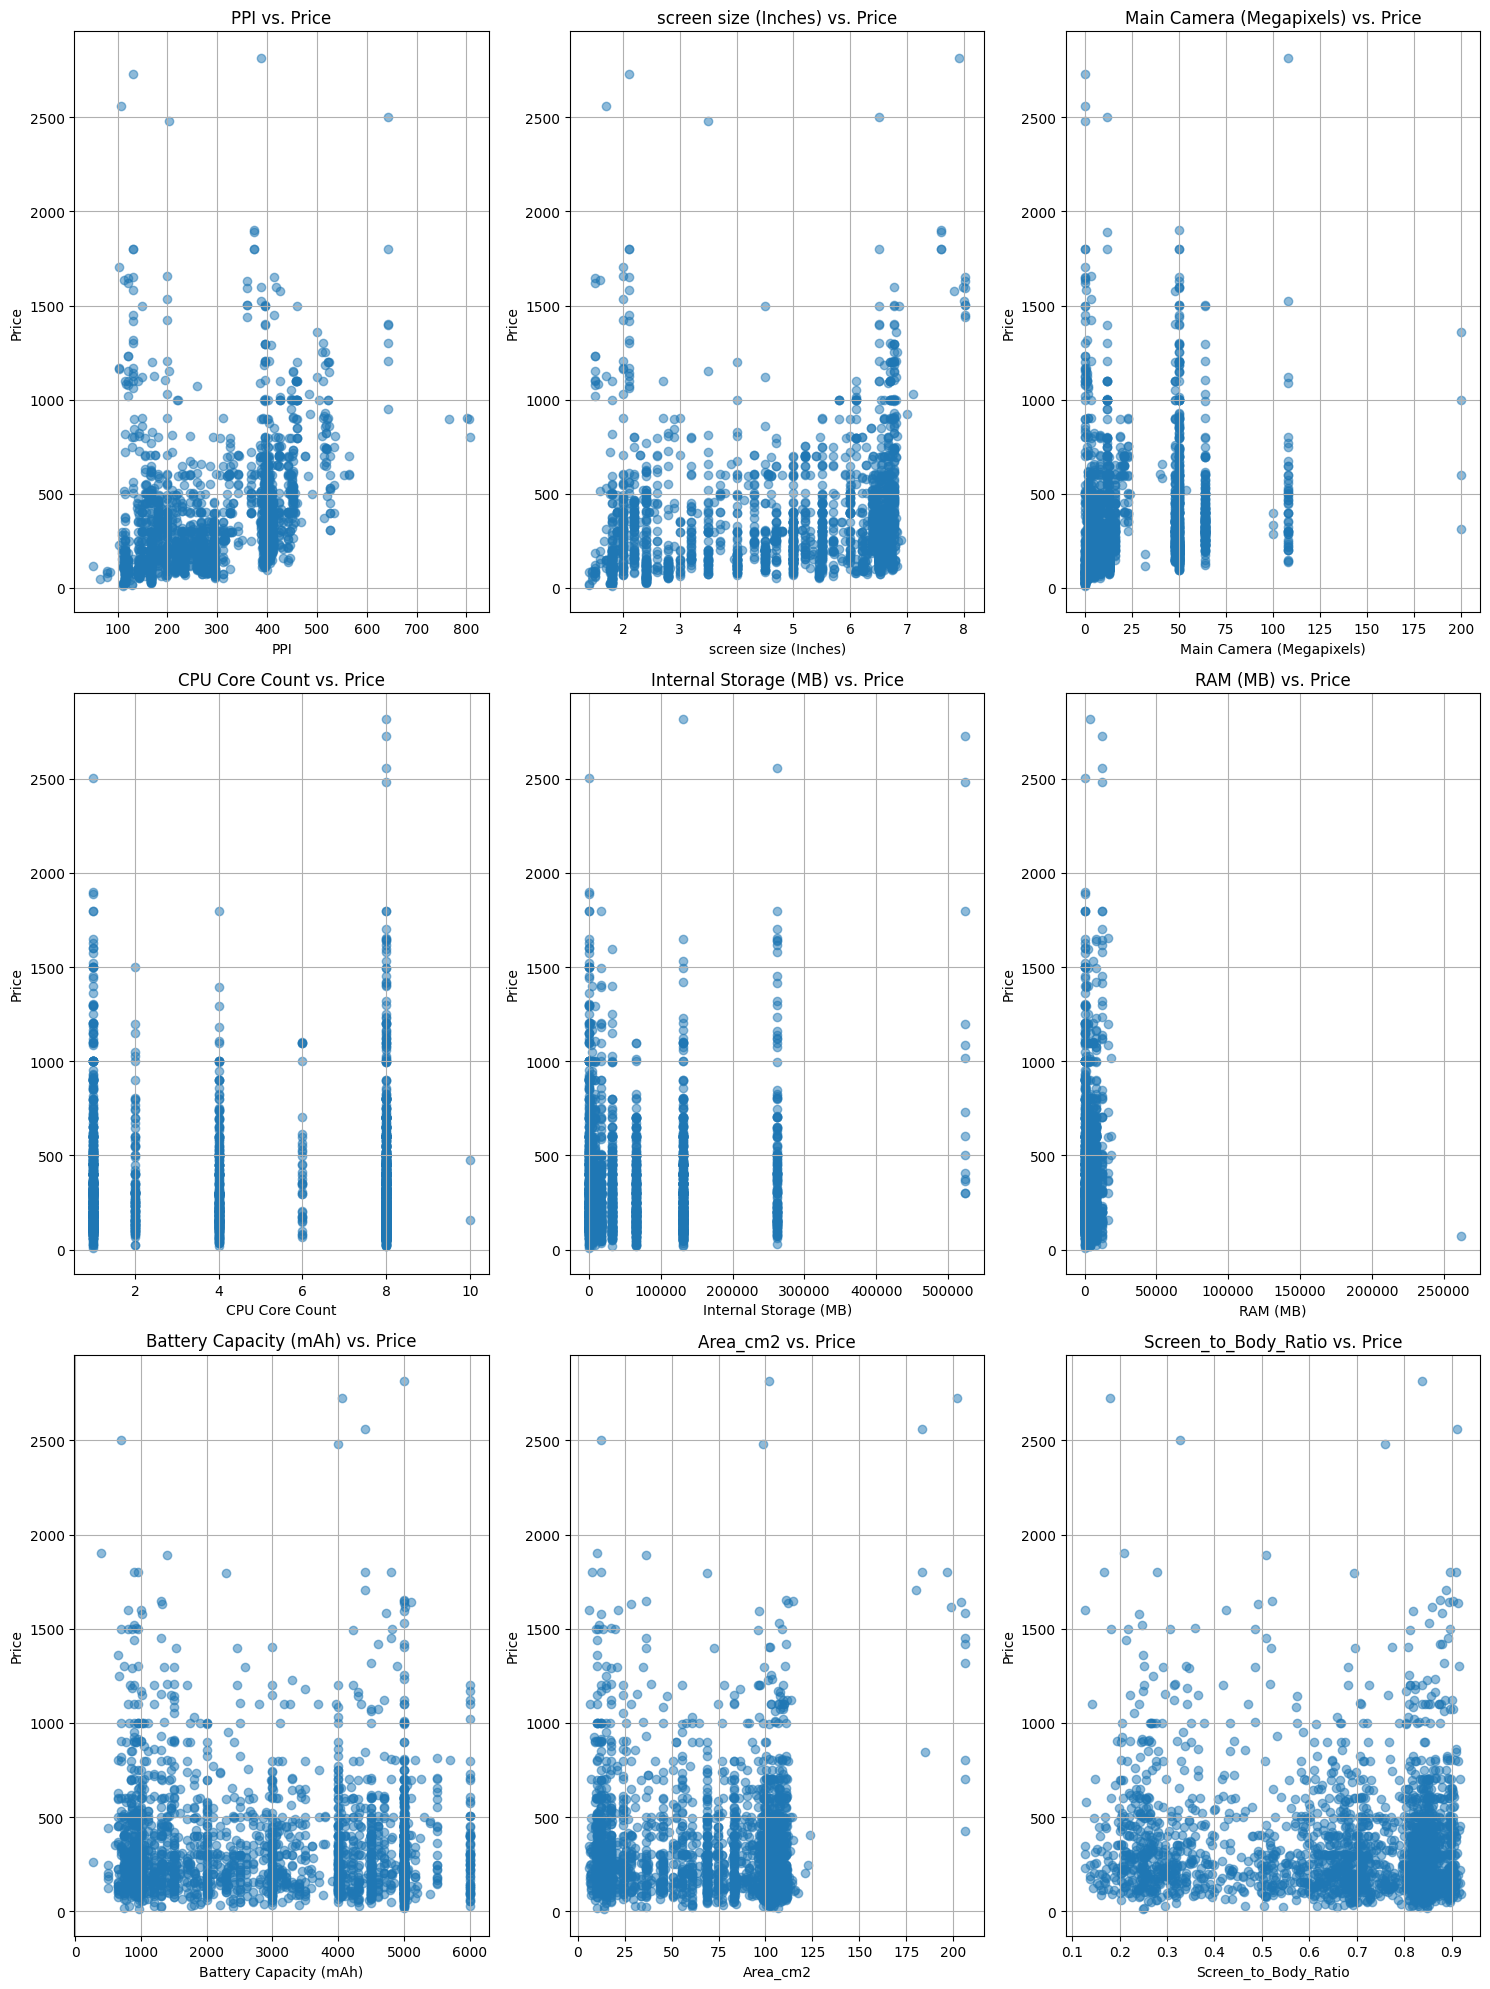

In [ ]:
features = [
    'PPI',
    'screen size (Inches)',
    'Main Camera (Megapixels)',
    'CPU Core Count',
    'Internal Storage (MB)',
    'RAM (MB)',
    'Battery Capacity (mAh)',
    'Area_cm2',
    'Screen_to_Body_Ratio'
]

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df['First Price'], alpha=0.5)
    plt.title(f'{feature} vs. Price')
    plt.xlabel(feature)
    plt.ylabel('Price')
    plt.grid(True)

plt.tight_layout()
plt.show()

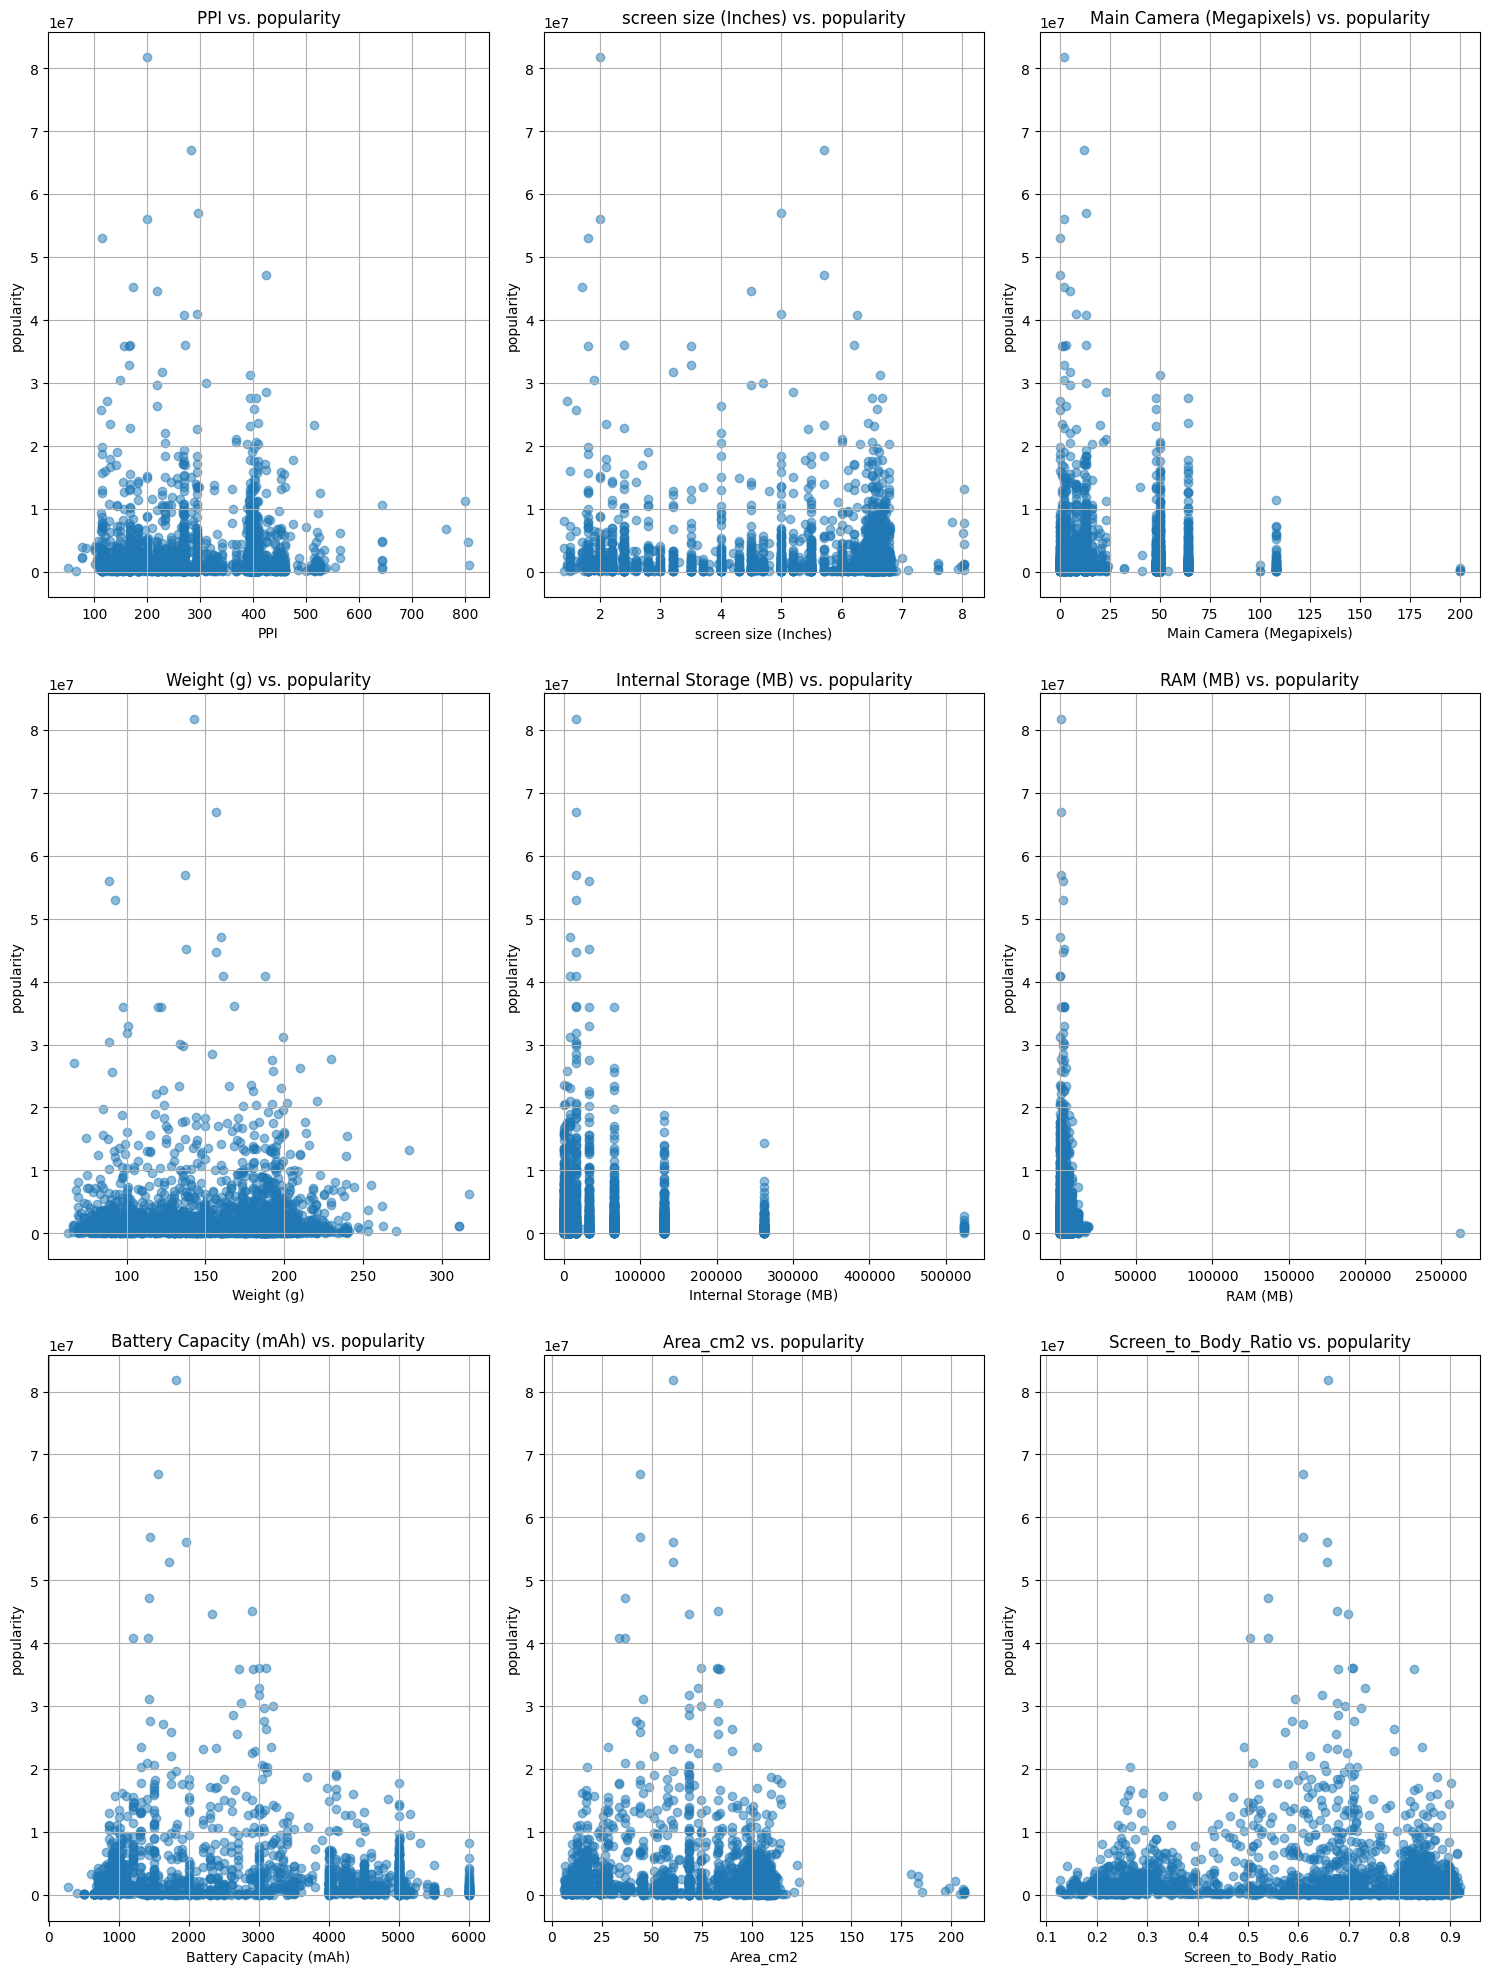

In [ ]:
features = [
    'PPI',
    'screen size (Inches)',
    'Main Camera (Megapixels)',
    'Weight (g)',
    'Internal Storage (MB)',
    'RAM (MB)',
    'Battery Capacity (mAh)',
    'Area_cm2',
    'Screen_to_Body_Ratio'
]

plt.figure(figsize=(15, 20))

for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    plt.scatter(df[feature], df['Popularity (Hits in GSMArena)'], alpha=0.5)
    plt.title(f'{feature} vs. popularity')
    plt.xlabel(feature)
    plt.ylabel('popularity')
    plt.grid(True)

plt.tight_layout()
plt.show()

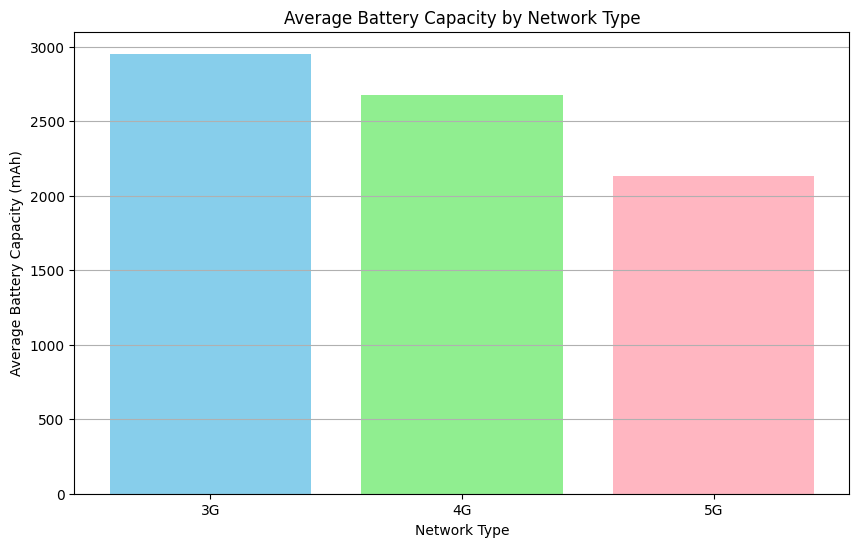

In [ ]:
battery_3g = df[df['3G']]['Battery Capacity (mAh)']
battery_4g = df[df['4G']]['Battery Capacity (mAh)']
battery_5g = df[df['5G']]['Battery Capacity (mAh)']

avg_battery_3g = battery_3g.mean()
avg_battery_4g = battery_4g.mean()
avg_battery_5g = battery_5g.mean()

categories = ['3G', '4G', '5G']
average_battery = [avg_battery_3g, avg_battery_4g, avg_battery_5g]

plt.figure(figsize=(10, 6))
plt.bar(categories, average_battery, color=['skyblue', 'lightgreen', 'lightpink'])
plt.xlabel('Network Type')
plt.ylabel('Average Battery Capacity (mAh)')
plt.title('Average Battery Capacity by Network Type')
plt.grid(axis='y')

plt.show()

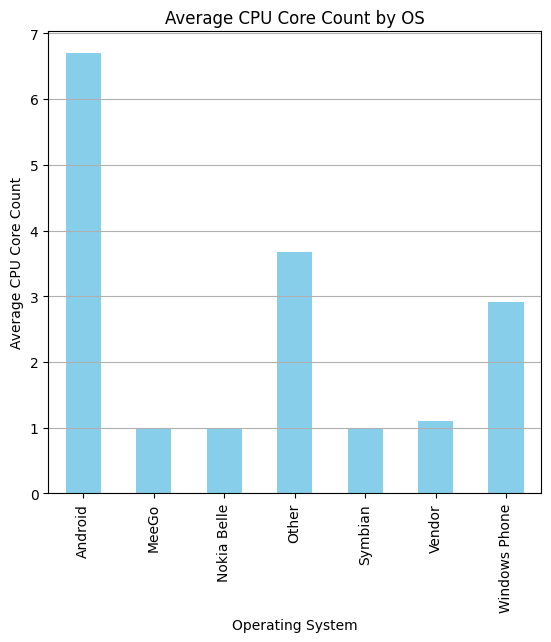

In [ ]:
avg_cpu_cores = df.groupby('OS')['CPU Core Count'].mean()

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
avg_cpu_cores.plot(kind='bar', color='skyblue')
plt.xlabel('Operating System')
plt.ylabel('Average CPU Core Count')
plt.title('Average CPU Core Count by OS')
plt.grid(axis='y')

plt.show()

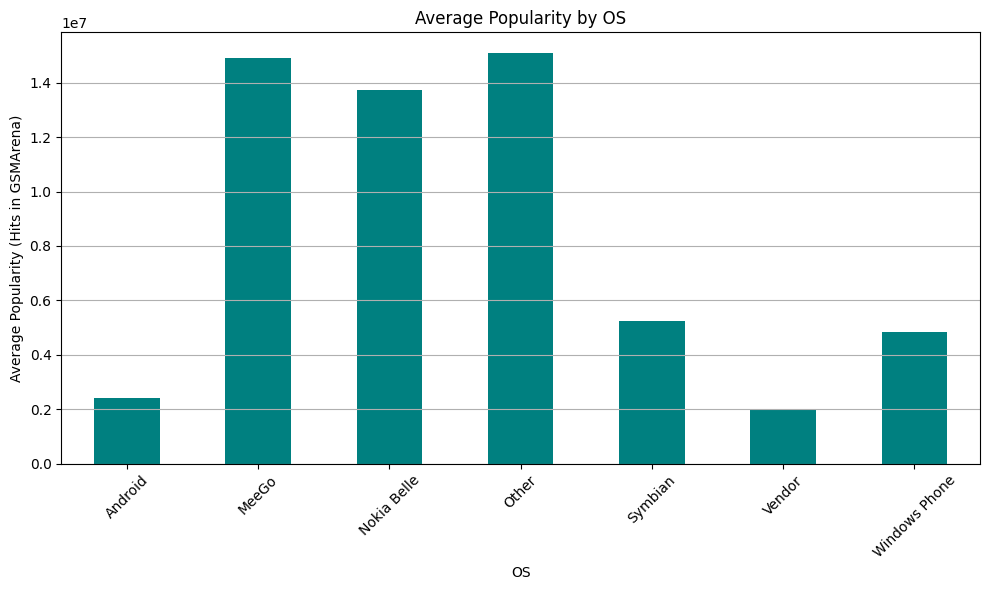

In [ ]:
avg_popularity_by_OS = df.groupby('OS')['Popularity (Hits in GSMArena)'].mean()

plt.figure(figsize=(10, 6))
avg_popularity_by_OS.plot(kind='bar', color='teal')
plt.xlabel('OS')
plt.ylabel('Average Popularity (Hits in GSMArena)')
plt.title('Average Popularity by OS')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

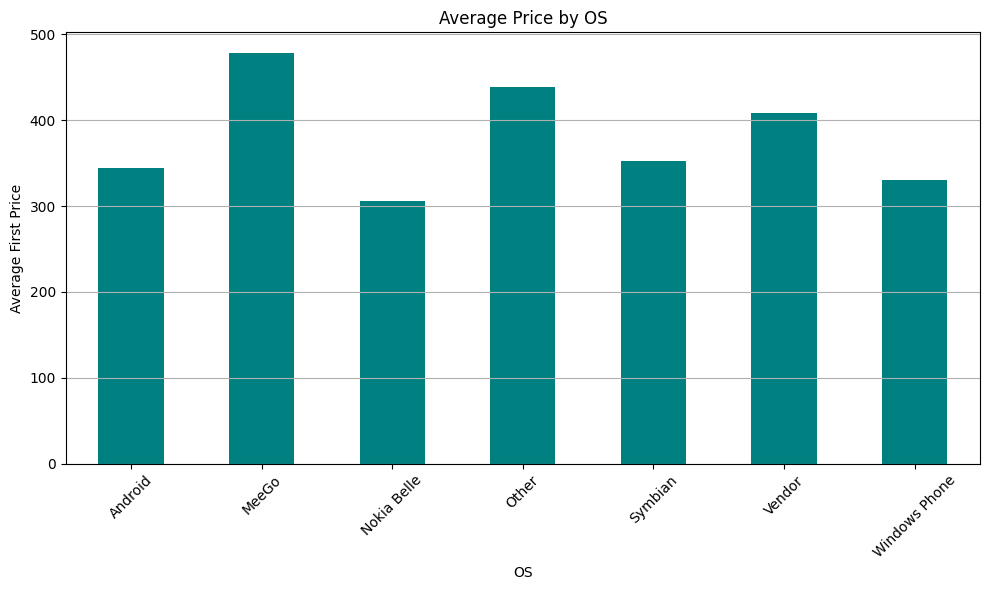

In [ ]:
avg_popularity_by_OS = df.groupby('OS')['First Price'].mean()

plt.figure(figsize=(10, 6))
avg_popularity_by_OS.plot(kind='bar', color='teal')
plt.xlabel('OS')
plt.ylabel('Average First Price')
plt.title('Average Price by OS')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

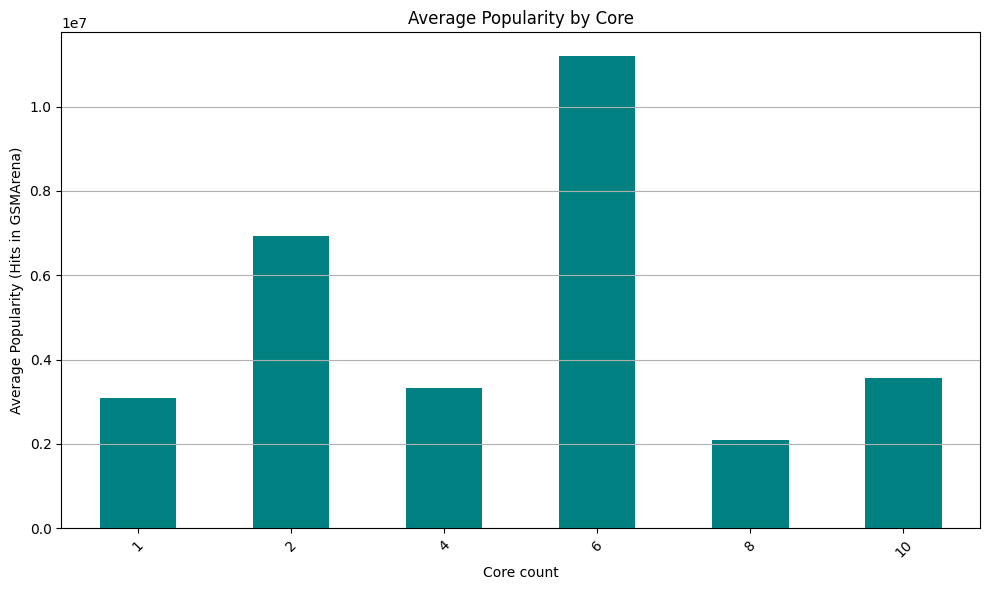

In [ ]:
avg_popularity_by_Core = df.groupby('CPU Core Count')['Popularity (Hits in GSMArena)'].mean()

plt.figure(figsize=(10, 6))
avg_popularity_by_Core.plot(kind='bar', color='teal')
plt.xlabel('Core count')
plt.ylabel('Average Popularity (Hits in GSMArena)')
plt.title('Average Popularity by Core')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

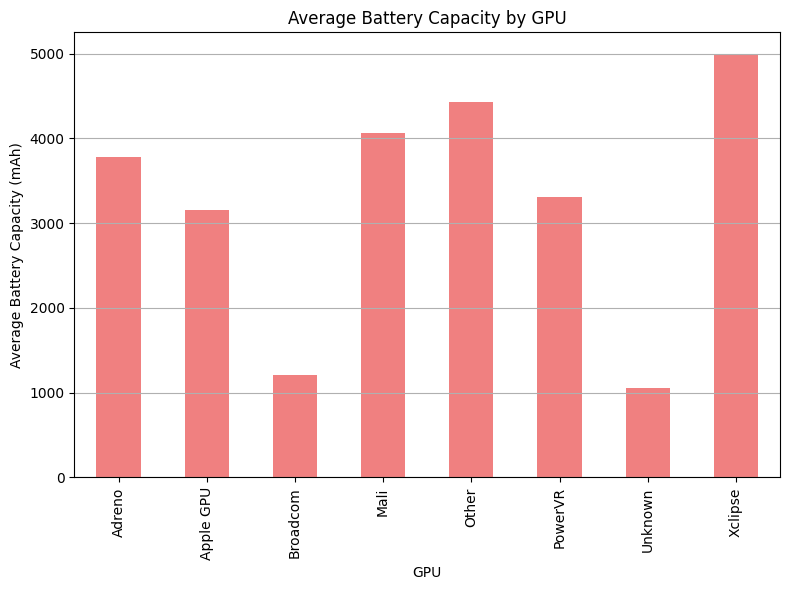

In [ ]:
avg_battery_capacity = df.groupby('GPU')['Battery Capacity (mAh)'].mean()

plt.figure(figsize=(8, 6))
avg_battery_capacity.plot(kind='bar', color='lightcoral')
plt.xlabel('GPU')
plt.ylabel('Average Battery Capacity (mAh)')
plt.title('Average Battery Capacity by GPU')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

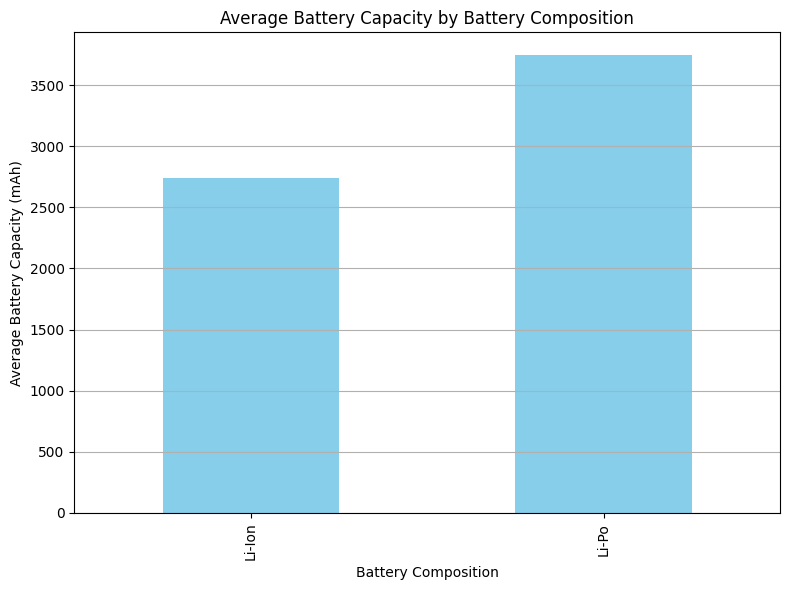

In [ ]:
avg_battery_capacity = df.groupby('Battery Composition')['Battery Capacity (mAh)'].mean()

plt.figure(figsize=(8, 6))
avg_battery_capacity.plot(kind='bar', color='skyblue')
plt.xlabel('Battery Composition')
plt.ylabel('Average Battery Capacity (mAh)')
plt.title('Average Battery Capacity by Battery Composition')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

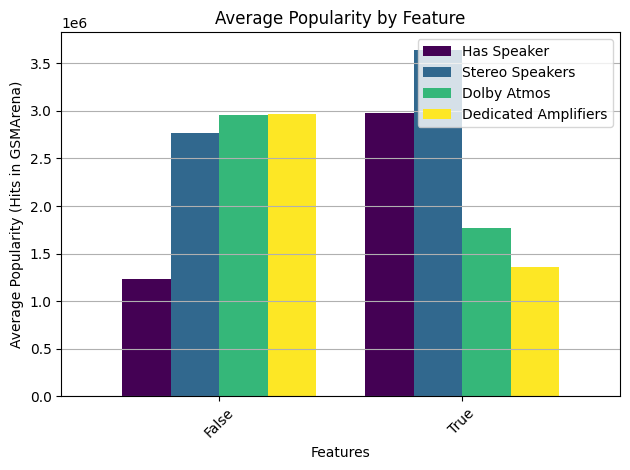

In [ ]:
def compute_average_popularity(df, feature):
    return df.groupby(feature)['Popularity (Hits in GSMArena)'].mean()

features = ['Has Speaker', 'Stereo Speakers', 'Dolby Atmos', 'Dedicated Amplifiers']
avg_popularities = {feature: compute_average_popularity(df, feature) for feature in features}

avg_popularity_df = pd.DataFrame(avg_popularities)

plt.figure(figsize=(12, 8))
avg_popularity_df.plot(kind='bar', width=0.8, colormap='viridis')
plt.xlabel('Features')
plt.ylabel('Average Popularity (Hits in GSMArena)')
plt.title('Average Popularity by Feature')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

#This code's syntax reference: https://datatab.net/tutorial/bar-chart

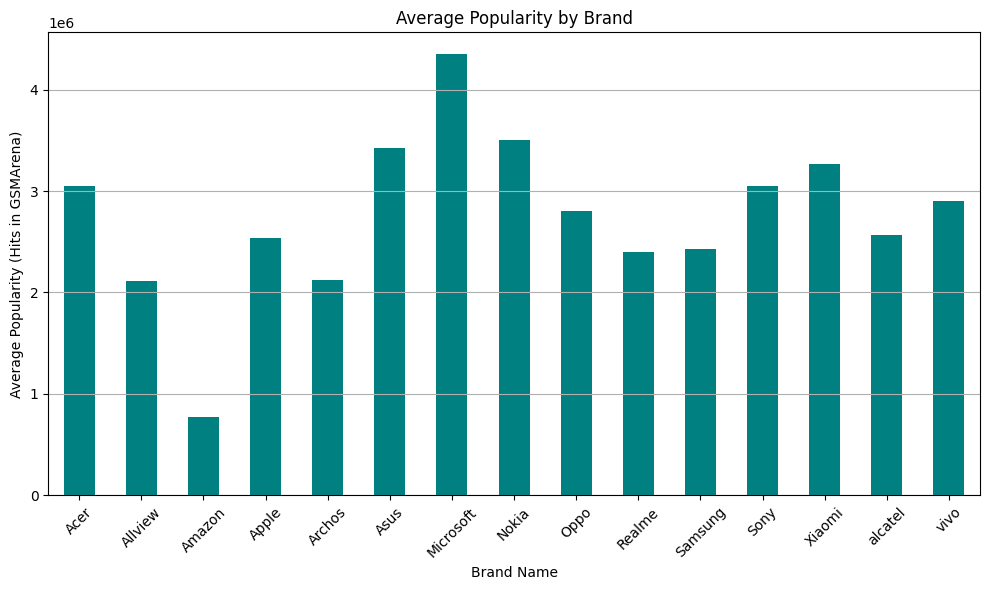

In [ ]:
avg_popularity_by_brand = df.groupby('Brand Name')['Popularity (Hits in GSMArena)'].mean()

plt.figure(figsize=(10, 6))
avg_popularity_by_brand.plot(kind='bar', color='teal')
plt.xlabel('Brand Name')
plt.ylabel('Average Popularity (Hits in GSMArena)')
plt.title('Average Popularity by Brand')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

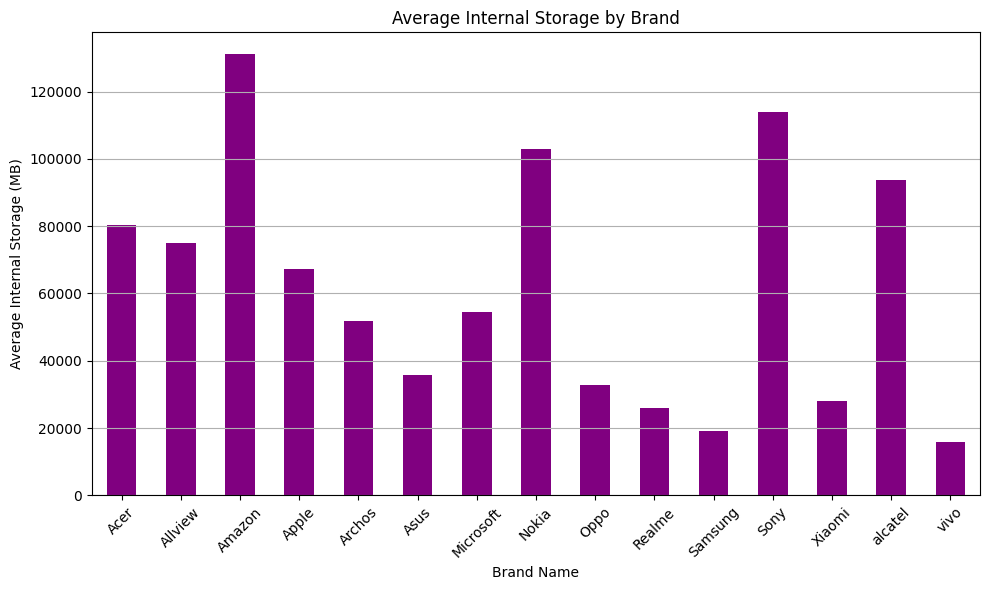

In [ ]:
avg_storage_by_brand = df.groupby('Brand Name')['Internal Storage (MB)'].mean()

plt.figure(figsize=(10, 6))
avg_storage_by_brand.plot(kind='bar', color='purple')
plt.xlabel('Brand Name')
plt.ylabel('Average Internal Storage (MB)')
plt.title('Average Internal Storage by Brand')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

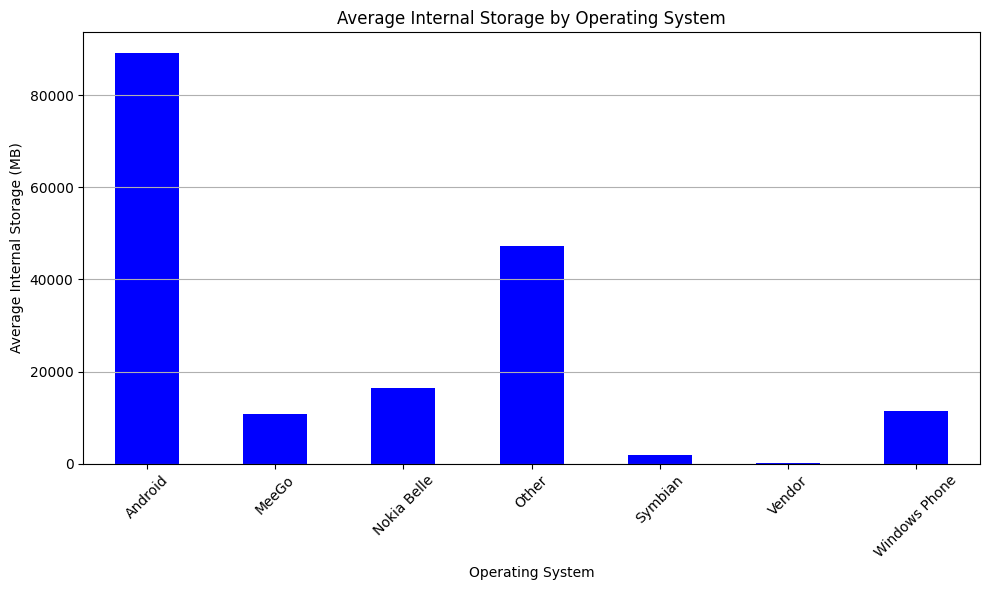

In [ ]:
avg_storage_by_os = df.groupby('OS')['Internal Storage (MB)'].mean()

plt.figure(figsize=(10, 6))
avg_storage_by_os.plot(kind='bar', color='blue')
plt.xlabel('Operating System')
plt.ylabel('Average Internal Storage (MB)')
plt.title('Average Internal Storage by Operating System')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

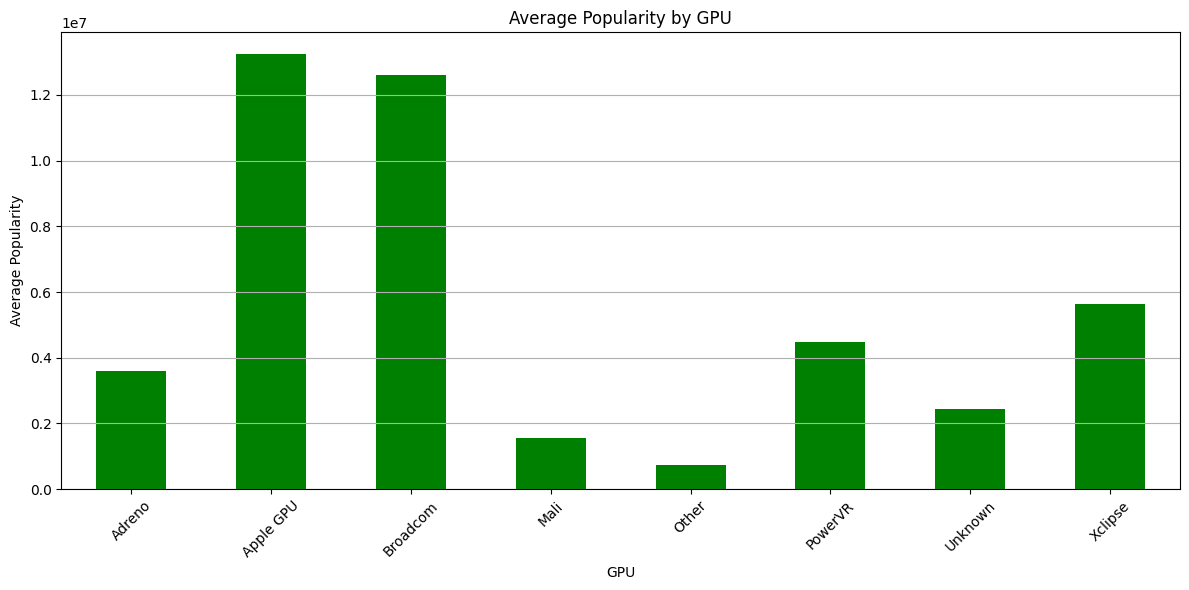

In [ ]:
avg_popularity_by_GPU = df.groupby('GPU')['Popularity (Hits in GSMArena)'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_GPU.plot(kind='bar', color='green')
plt.xlabel('GPU')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by GPU')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

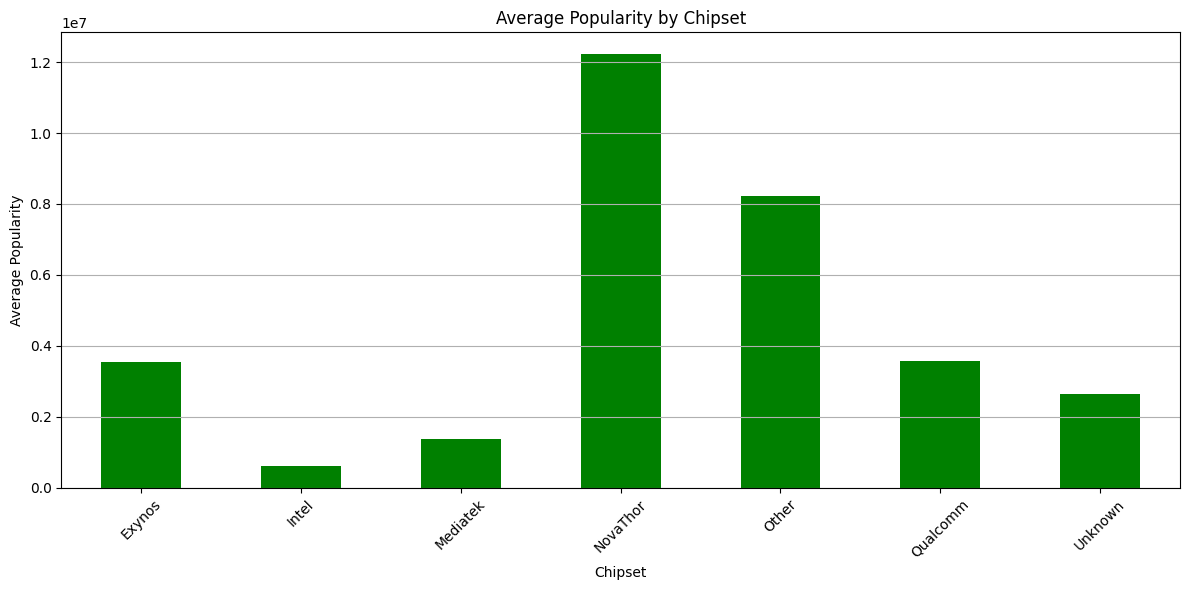

In [ ]:
avg_popularity_by_chipset = df.groupby('Chipset')['Popularity (Hits in GSMArena)'].mean()

plt.figure(figsize=(12, 6))
avg_popularity_by_chipset.plot(kind='bar', color='green')
plt.xlabel('Chipset')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Chipset')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

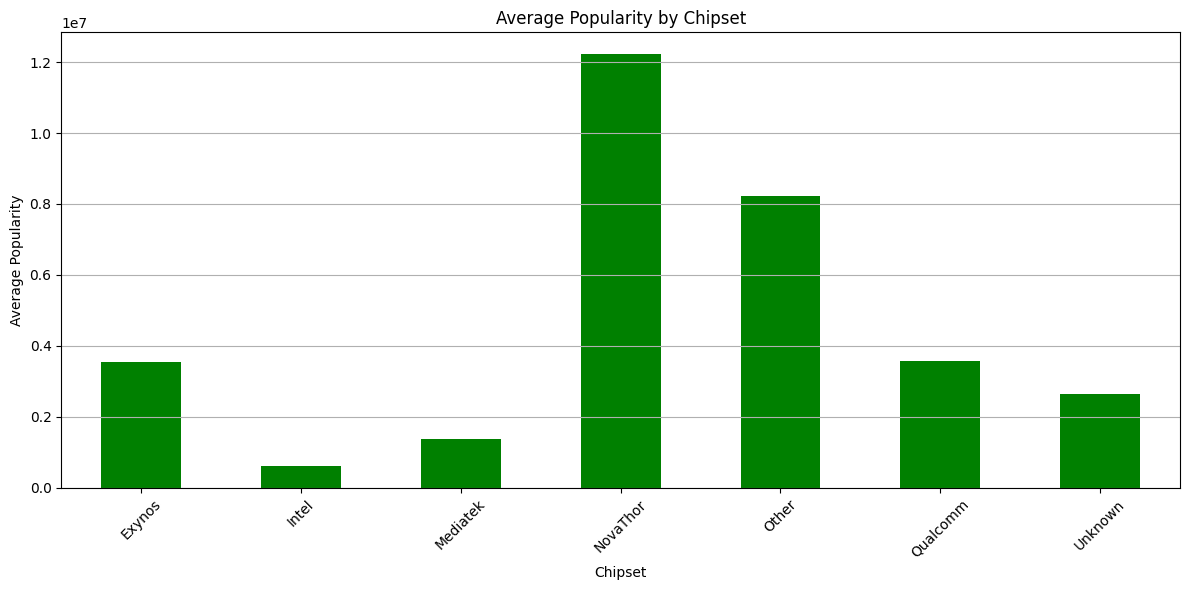

In [ ]:
avg_popularity_by_chipset = df.groupby('Chipset')['Popularity (Hits in GSMArena)'].mean()

plt.figure(figsize=(12, 6))
ax = avg_popularity_by_chipset.plot(kind='bar', color='green')
plt.xlabel('Chipset')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Chipset')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

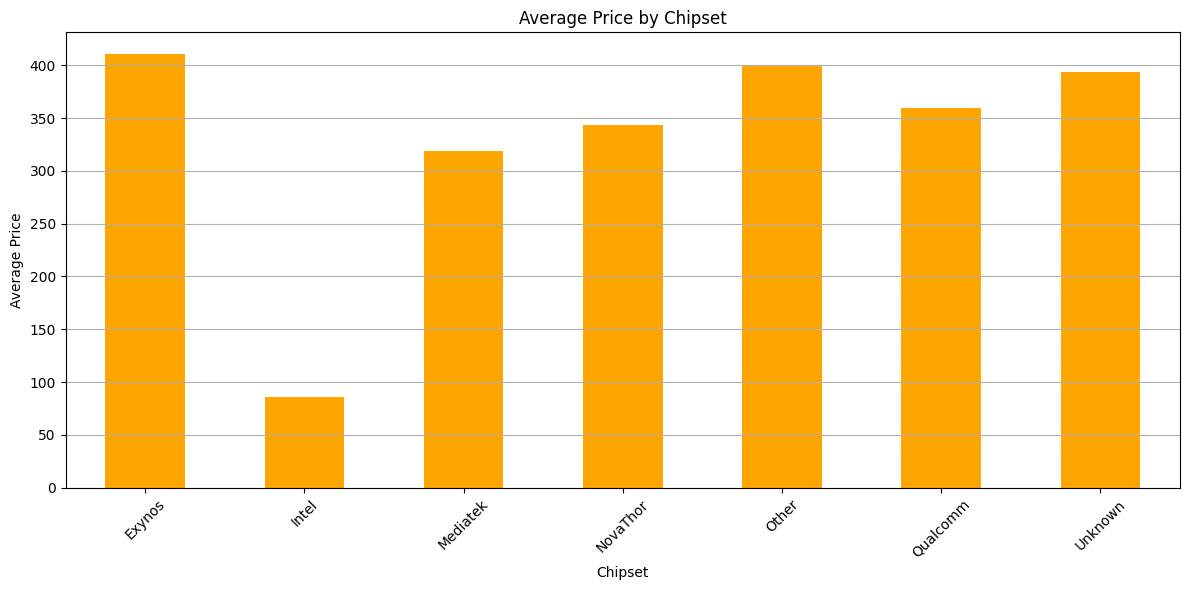

In [ ]:
avg_price_by_chipset = df.groupby('Chipset')['First Price'].mean()

plt.figure(figsize=(12, 6))
ax = avg_price_by_chipset.plot(kind='bar', color='orange')
plt.xlabel('Chipset')
plt.ylabel('Average Price')
plt.title('Average Price by Chipset')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

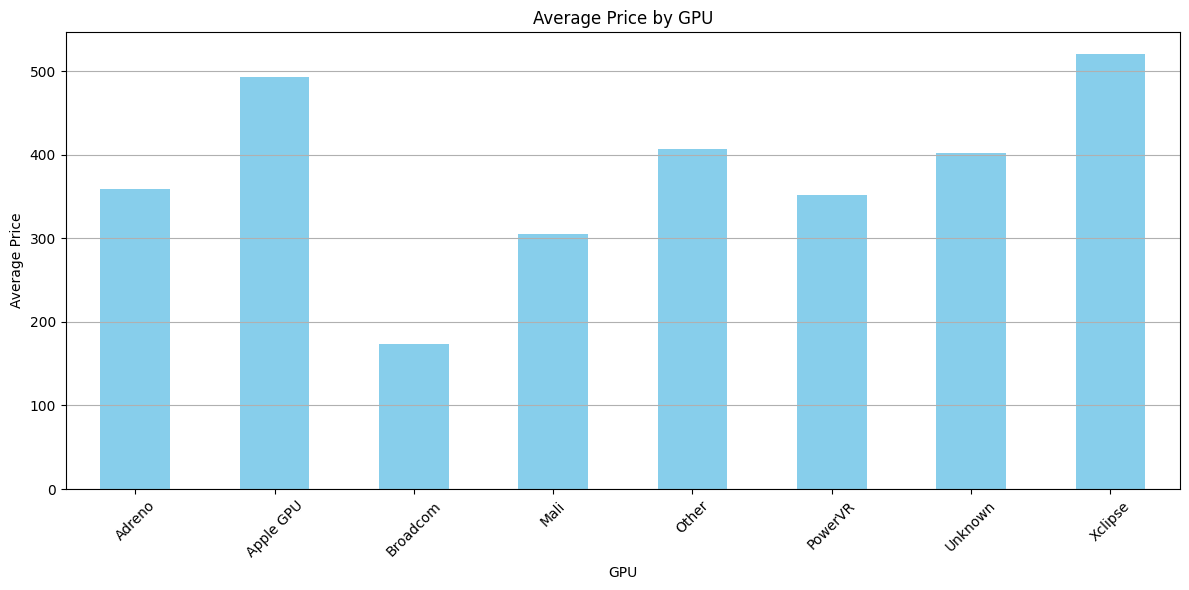

In [ ]:
avg_price_by_gpu = df.groupby('GPU')['First Price'].mean()

plt.figure(figsize=(12, 6))
ax = avg_price_by_gpu.plot(kind='bar', color='skyblue')
plt.xlabel('GPU')
plt.ylabel('Average Price')
plt.title('Average Price by GPU')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

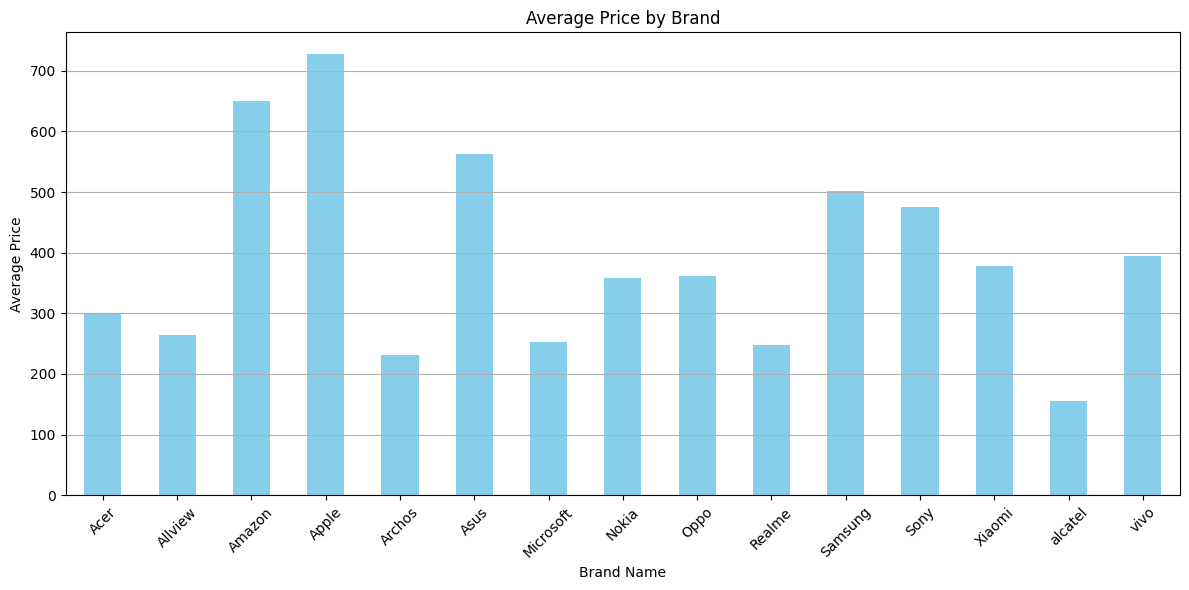

In [ ]:
avg_price_by_brand = df.groupby('Brand Name')['First Price'].mean()

plt.figure(figsize=(12, 6))
ax = avg_price_by_brand.plot(kind='bar', color='skyblue')
plt.xlabel('Brand Name')
plt.ylabel('Average Price')
plt.title('Average Price by Brand')
plt.xticks(rotation=45)
plt.grid(axis='y')

plt.tight_layout()
plt.show()

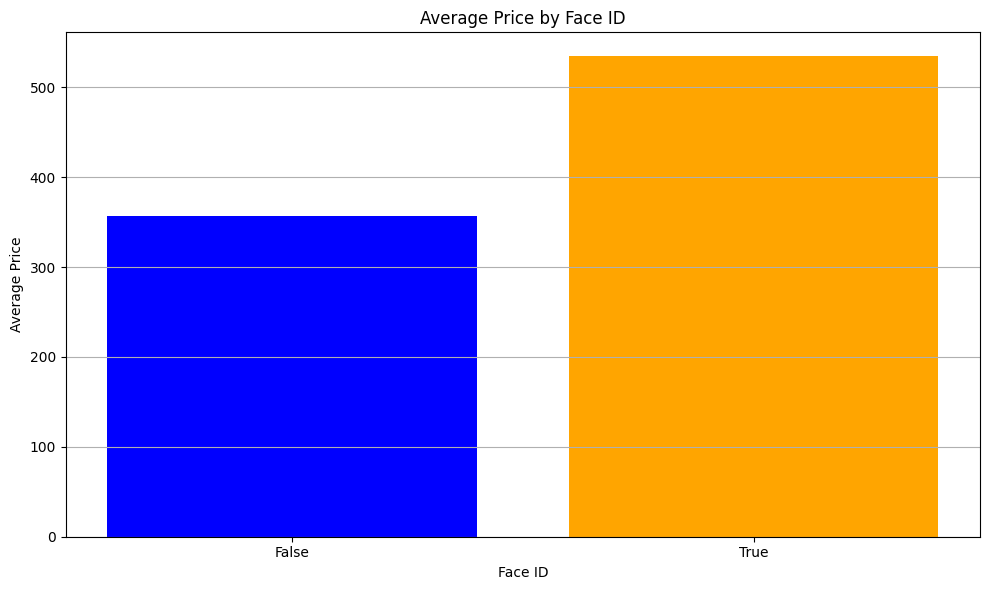

In [ ]:
avg_prices = df.groupby('Face ID')['First Price'].mean().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_prices['Face ID'].astype(str), avg_prices['First Price'], color=['blue', 'orange'])
plt.xlabel('Face ID')
plt.ylabel('Average Price')
plt.title('Average Price by Face ID')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

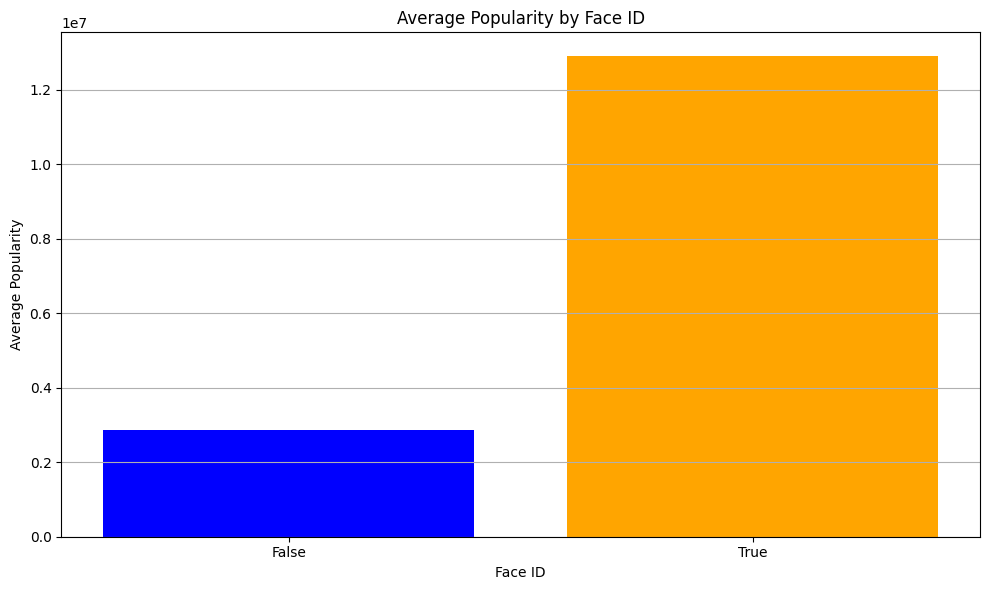

In [ ]:
avg_popularity = df.groupby('Face ID')['Popularity (Hits in GSMArena)'].mean().reset_index()

plt.figure(figsize=(10, 6))
bars = plt.bar(avg_popularity['Face ID'].astype(str), avg_popularity['Popularity (Hits in GSMArena)'], color=['blue', 'orange'])
plt.xlabel('Face ID')
plt.ylabel('Average Popularity')
plt.title('Average Popularity by Face ID')
plt.grid(axis='y')

plt.tight_layout()
plt.show()

<Figure size 1500x1000 with 0 Axes>

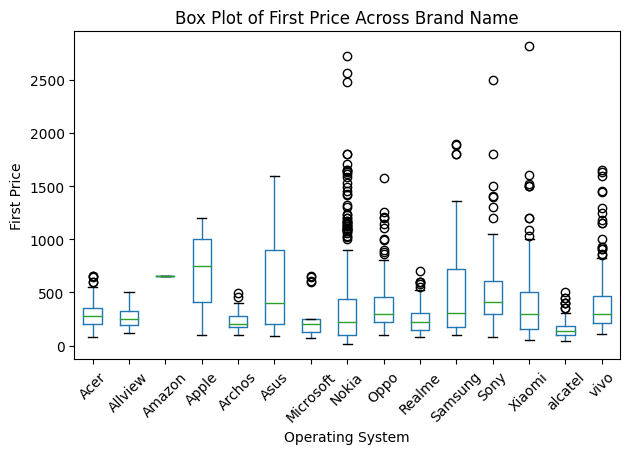

In [ ]:
plt.figure(figsize=(15, 10))
df.boxplot(column='First Price', by='Brand Name', grid=False, showfliers=True)

plt.title('Box Plot of First Price Across Brand Name')
plt.suptitle('')
plt.xlabel('Operating System')
plt.ylabel('First Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

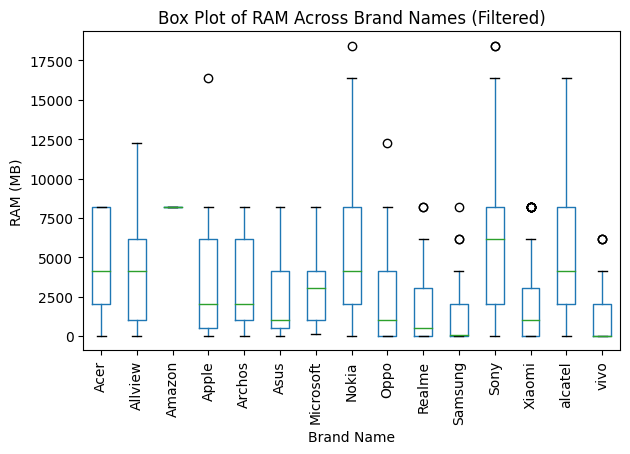

In [ ]:
#This threshold is done to visualize the box plots without an outlier that makes the box plots no visible enough
threshold = 200000

filtered_df = df[df['RAM (MB)'] <= threshold]

plt.figure(figsize=(12, 8))
filtered_df.boxplot(column='RAM (MB)', by='Brand Name', grid=False, showfliers=True)

plt.title('Box Plot of RAM Across Brand Names (Filtered)')
plt.suptitle('')
plt.xlabel('Brand Name')
plt.ylabel('RAM (MB)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

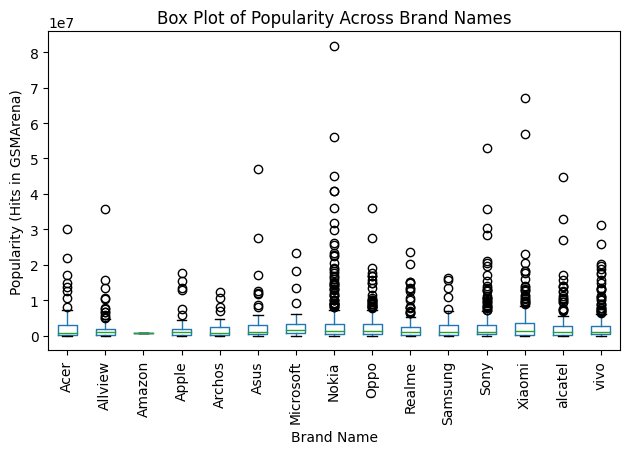

In [ ]:
plt.figure(figsize=(12, 8))
df.boxplot(column='Popularity (Hits in GSMArena)', by='Brand Name', grid=False, showfliers=True)

plt.title('Box Plot of Popularity Across Brand Names')
plt.suptitle('')
plt.xlabel('Brand Name')
plt.ylabel('Popularity (Hits in GSMArena)')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

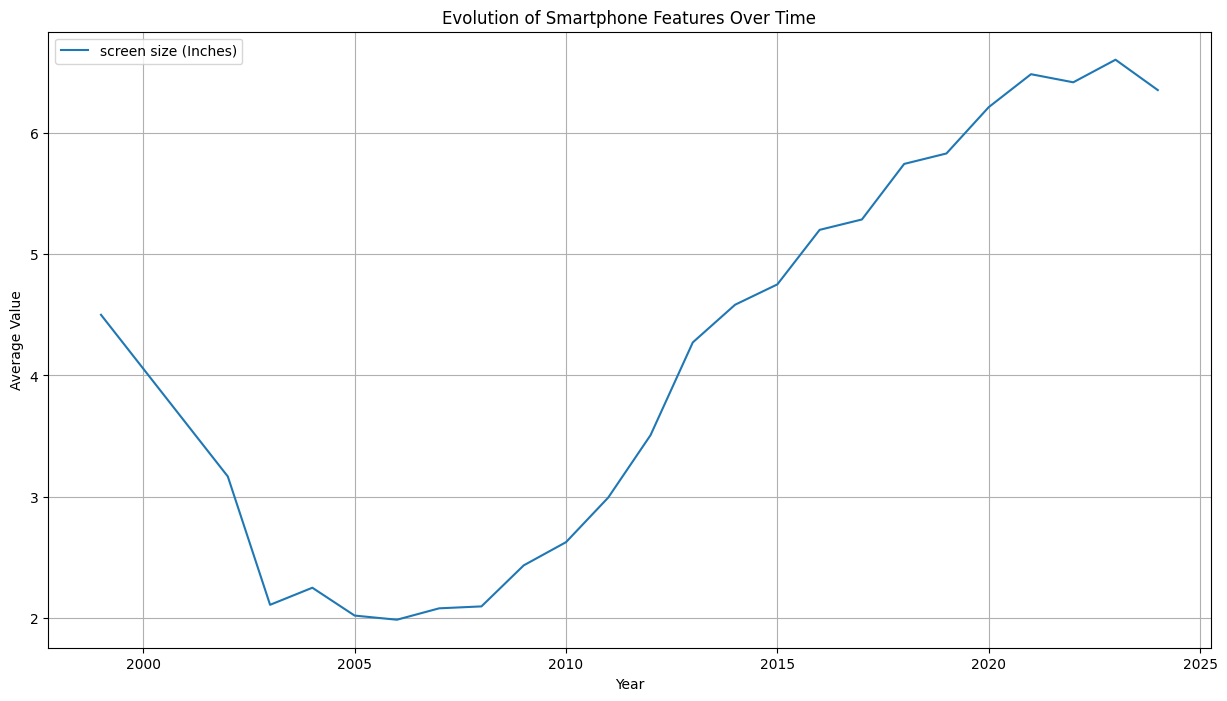

In [ ]:
df['Announced'] = pd.to_datetime(df['Announced'], dayfirst=True, errors='coerce')

df['Year'] = df['Announced'].dt.year

numeric_df = df.select_dtypes(include='number')

grouped_df = numeric_df.groupby(df['Year']).mean()

plt.figure(figsize=(15, 8))

plt.plot(grouped_df.index, grouped_df['screen size (Inches)'], label='screen size (Inches)')

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Evolution of Smartphone Features Over Time')
plt.legend()
plt.grid(True)
plt.show()

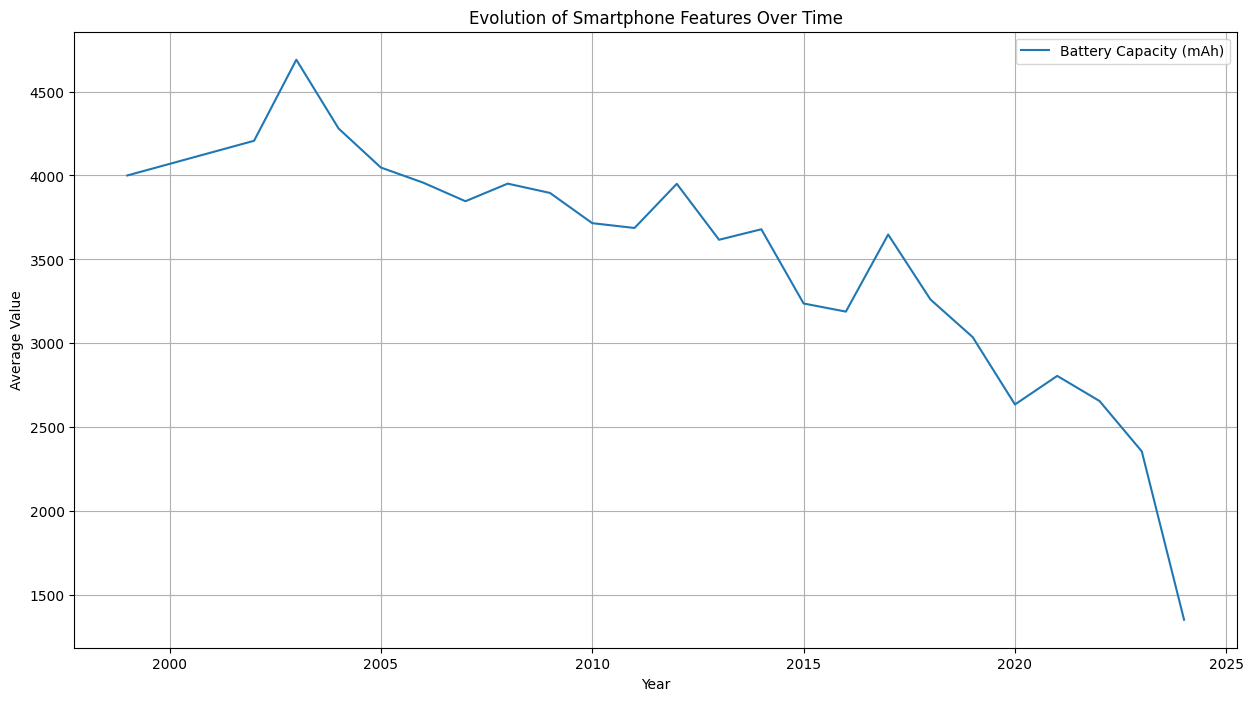

In [ ]:
df['Announced'] = pd.to_datetime(df['Announced'], dayfirst=True, errors='coerce')

df['Year'] = df['Announced'].dt.year

numeric_df = df.select_dtypes(include='number')

grouped_df = numeric_df.groupby(df['Year']).mean()

plt.figure(figsize=(15, 8))

plt.plot(grouped_df.index, grouped_df['Battery Capacity (mAh)'], label='Battery Capacity (mAh)')

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Evolution of Smartphone Features Over Time')
plt.legend()
plt.grid(True)
plt.show()

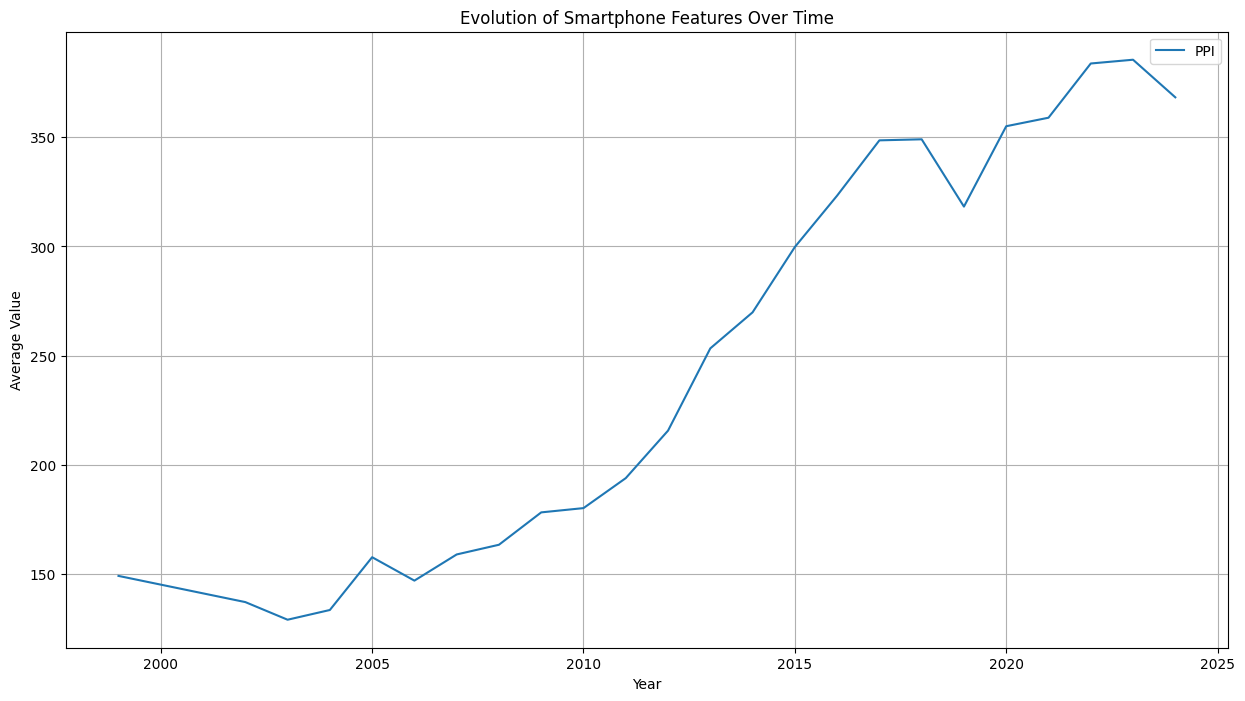

In [ ]:
df['Announced'] = pd.to_datetime(df['Announced'], dayfirst=True, errors='coerce')

df['Year'] = df['Announced'].dt.year

numeric_df = df.select_dtypes(include='number')

grouped_df = numeric_df.groupby(df['Year']).mean()

plt.figure(figsize=(15, 8))

plt.plot(grouped_df.index, grouped_df['PPI'], label='PPI')

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Evolution of Smartphone Features Over Time')
plt.legend()
plt.grid(True)
plt.show()

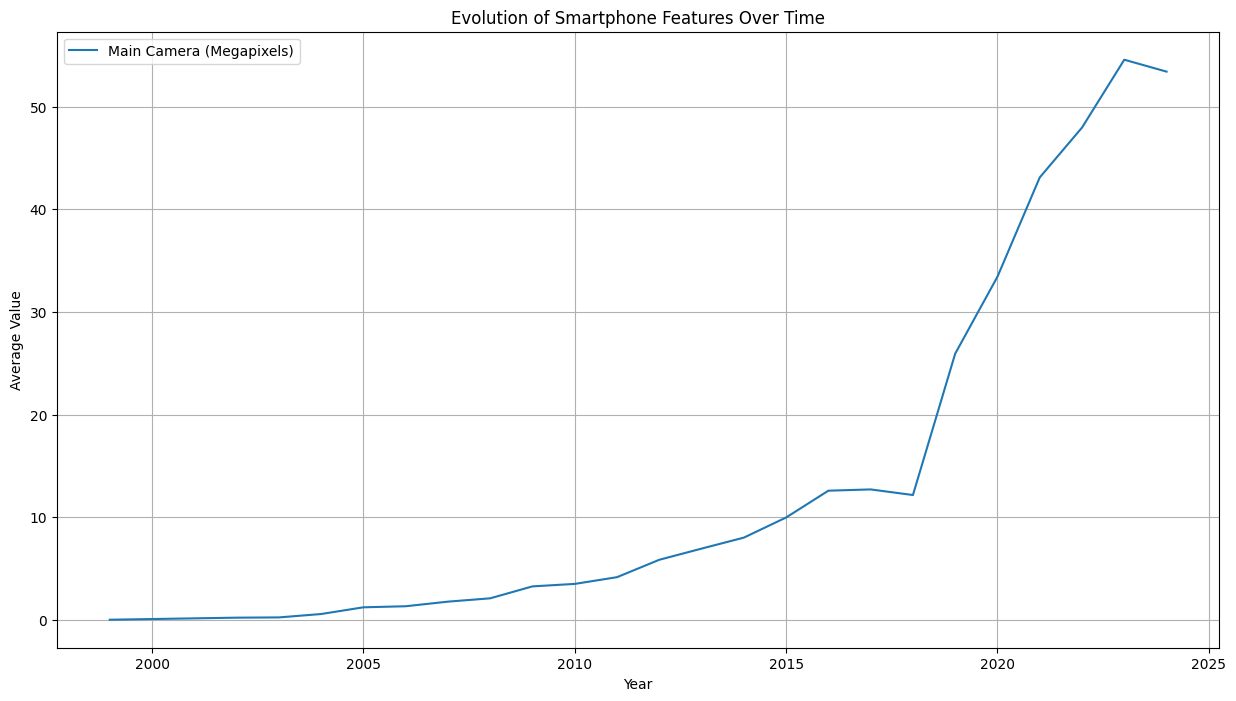

In [ ]:
df['Announced'] = pd.to_datetime(df['Announced'], dayfirst=True, errors='coerce')

df['Year'] = df['Announced'].dt.year

numeric_df = df.select_dtypes(include='number')

grouped_df = numeric_df.groupby(df['Year']).mean()

plt.figure(figsize=(15, 8))

plt.plot(grouped_df.index, grouped_df['Main Camera (Megapixels)'], label='Main Camera (Megapixels)')

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Evolution of Smartphone Features Over Time')
plt.legend()
plt.grid(True)
plt.show()

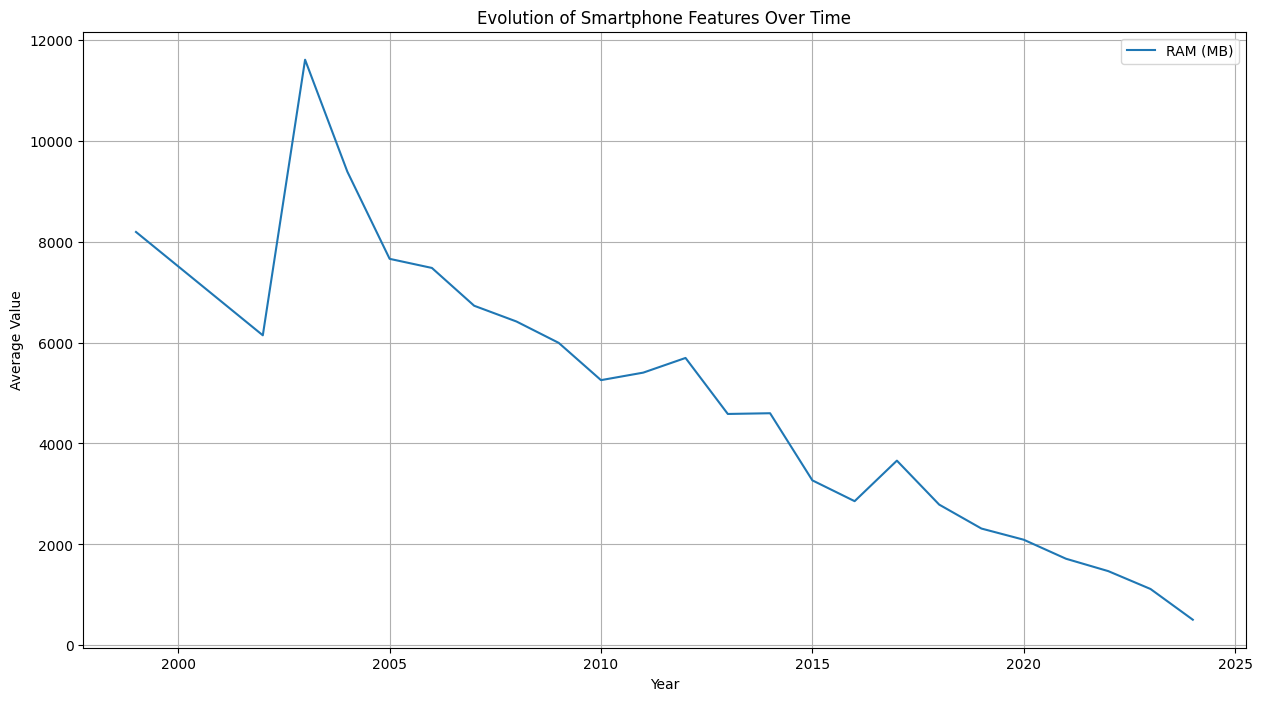

In [ ]:
df['Announced'] = pd.to_datetime(df['Announced'], dayfirst=True, errors='coerce')

df['Year'] = df['Announced'].dt.year

numeric_df = df.select_dtypes(include='number')

grouped_df = numeric_df.groupby(df['Year']).mean()

plt.figure(figsize=(15, 8))

plt.plot(grouped_df.index, grouped_df['RAM (MB)'], label='RAM (MB)')

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Evolution of Smartphone Features Over Time')
plt.legend()
plt.grid(True)
plt.show()

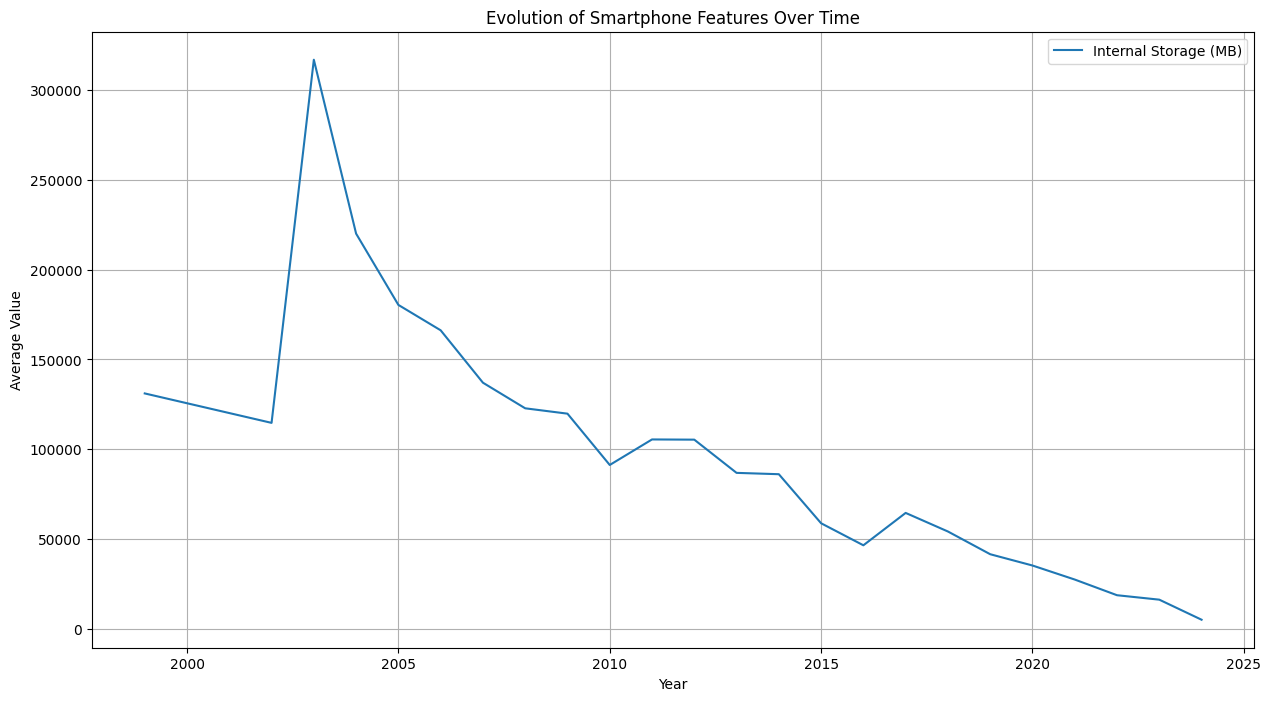

In [ ]:
df['Announced'] = pd.to_datetime(df['Announced'], dayfirst=True, errors='coerce')

df['Year'] = df['Announced'].dt.year

numeric_df = df.select_dtypes(include='number')

grouped_df = numeric_df.groupby(df['Year']).mean()

plt.figure(figsize=(15, 8))

plt.plot(grouped_df.index, grouped_df['Internal Storage (MB)'], label='Internal Storage (MB)')

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Evolution of Smartphone Features Over Time')
plt.legend()
plt.grid(True)
plt.show()

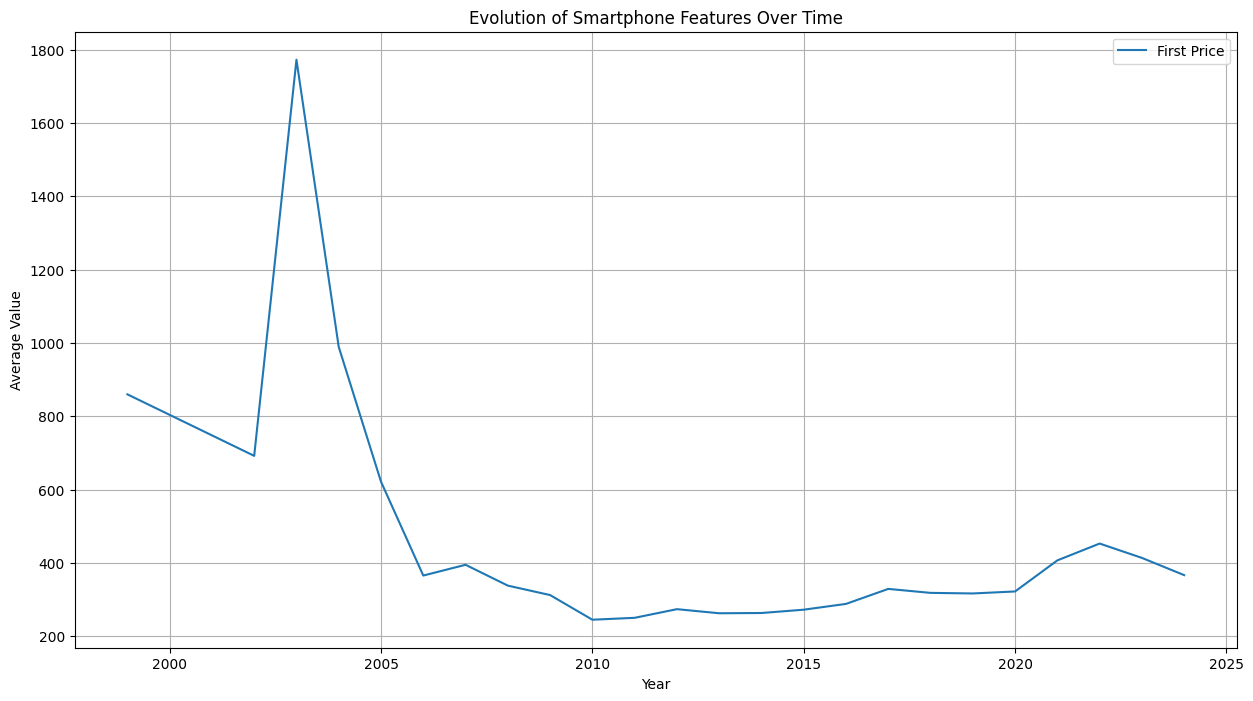

In [ ]:
df['Announced'] = pd.to_datetime(df['Announced'], dayfirst=True, errors='coerce')

df['Year'] = df['Announced'].dt.year

numeric_df = df.select_dtypes(include='number')

grouped_df = numeric_df.groupby(df['Year']).mean()

plt.figure(figsize=(15, 8))

plt.plot(grouped_df.index, grouped_df['First Price'], label='First Price')

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Evolution of Smartphone Features Over Time')
plt.legend()
plt.grid(True)
plt.show()

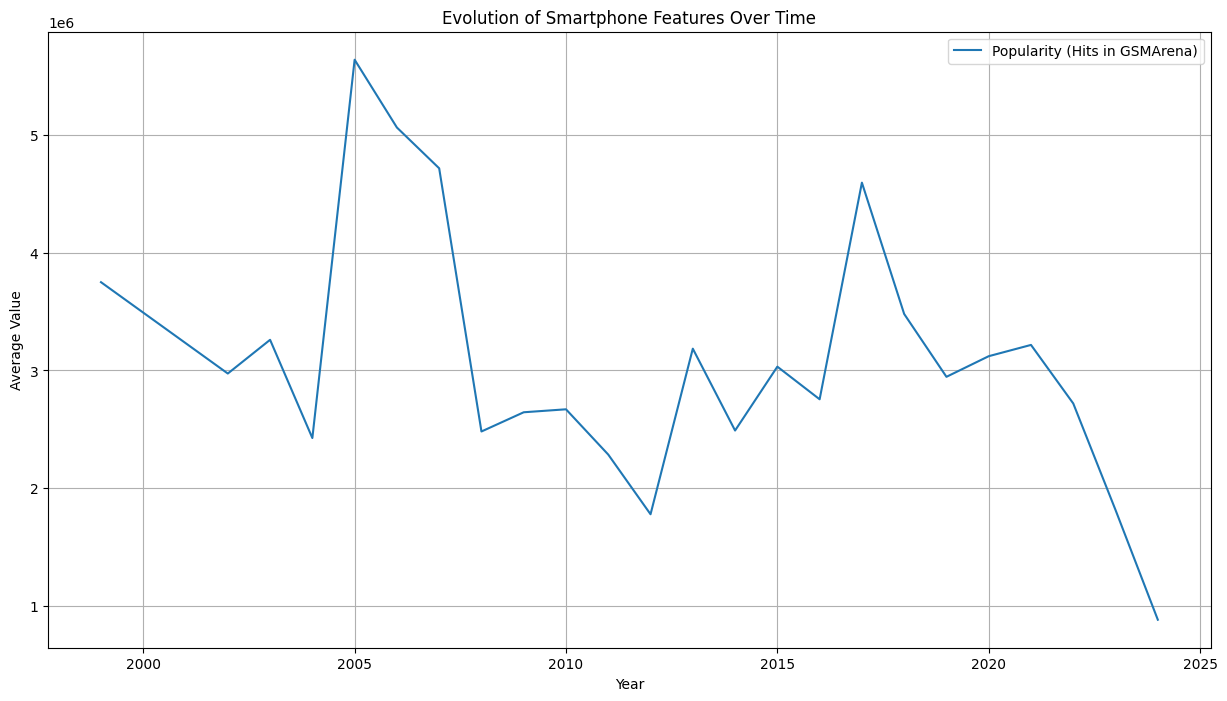

In [ ]:
df['Announced'] = pd.to_datetime(df['Announced'], dayfirst=True, errors='coerce')

df['Year'] = df['Announced'].dt.year

numeric_df = df.select_dtypes(include='number')

grouped_df = numeric_df.groupby(df['Year']).mean()

plt.figure(figsize=(15, 8))

plt.plot(grouped_df.index, grouped_df['Popularity (Hits in GSMArena)'], label='Popularity (Hits in GSMArena)')

plt.xlabel('Year')
plt.ylabel('Average Value')
plt.title('Evolution of Smartphone Features Over Time')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
contingency_table_cpu_gpu = pd.crosstab(df['Chipset'], df['GPU'])

print(contingency_table_cpu_gpu)

GPU       Adreno  Apple GPU  Broadcom  Mali  Other  PowerVR  Unknown  Xclipse
Chipset                                                                      
Exynos         0          0         0    21      0        0        0        1
Intel          0          0         0     0      0        1        0        0
Mediatek       0          0         0   490     21      171       11        0
NovaThor       0          0         0     4      0        0        0        0
Other          1         27         0    30     20       16       37        0
Qualcomm     869          0         0     0      0        0        5        0
Unknown        0          0         8    11      2       15      565        0


In [ ]:
contingency_table = pd.crosstab(df['Battery Composition'], df['USB Type'])

print(contingency_table)

USB Type             Standard USB  Type-C  microUSB  miniUSB
Battery Composition                                         
Li-Ion                         28     507       944       58
Li-Po                           8     469       305        7


In [ ]:
contingency_table_Wireless = pd.crosstab(df['Battery Composition'], df['Supports Wireless Charging'])

print(contingency_table_Wireless)

Supports Wireless Charging  False  True 
Battery Composition                     
Li-Ion                       1453     84
Li-Po                         734     55


In [ ]:
contingency_table_NFC = pd.crosstab(df['OS'], df['Has NFC'])

print(contingency_table_NFC)

Has NFC        False  True 
OS                         
Android          896    729
MeeGo              1      1
Nokia Belle        0      1
Other             32     35
Symbian          129      7
Vendor           413      3
Windows Phone     52     27


In [ ]:
contingency_table_3g_4g_5g = pd.crosstab(
    index=df['Chipset'],
    columns=[df['3G'], df['4G'], df['5G']],
    dropna=False
)

print(contingency_table_3g_4g_5g)

3G       False                   True                   
4G       False       True        False       True       
5G       False True  False True  False True  False True 
Chipset                                                 
Exynos       3     0     0     0     7     0    10     2
Intel        0     0     0     0     0     0     1     0
Mediatek    86     0     2     0   177     0   280   148
NovaThor     1     0     0     0     0     0     1     2
Other       31     0     0     0    23     0    39    38
Qualcomm   190     0     0     0   275     0   303   106
Unknown     30     0     0     0    38     0   220   313


-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

-------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
top_20_popularity = df.sort_values(by='Popularity (Hits in GSMArena)', ascending=False).head(20)

top_20_popularity

,Brand Name,Mobile Name,Announced,Length (mm),Width (mm),Depth (mm),Weight (g),2G,3G,4G,...,Battery Removability,Supports Wireless Charging,Number of Colors Supported,Colors,Sim Type,Supports_eSIM,Area_cm2,Screen_to_Body_Ratio,Popularity (Hits in GSMArena),First Price
172,Nokia,8600 Luna,5/1/2007,107.0,45.0,15.9,143.0,True,False,False,...,Removable,False,3,"Space Gray, Silver, Gold",Nano-SIM,False,60.9,0.6580,81755473,1029.89
1174,Xiaomi,Redmi 5,12/1/2017,151.8,72.8,7.7,157.0,True,True,True,...,Removable,False,3,"Space Gray, White/Silver, Gold",Nano-SIM,False,44.1,0.6080,66961657,121.00
1172,Xiaomi,Redmi 5A,11/1/2017,140.4,70.1,8.4,137.0,True,True,True,...,Removable,False,2,"Black/Slate, White/Silver",Nano-SIM,False,44.1,0.6080,56934304,129.00
171,Nokia,6120 classic,4/1/2007,105.0,46.0,15.0,89.0,True,True,False,...,Removable,False,6,"Jet Black, Black, Silver, Gold, Rose Gold, Red",Nano-SIM,False,60.9,0.6560,56047596,352.73
98,Sony,Ericsson Z530,2/1/2006,90.0,47.0,24.0,93.0,True,False,False,...,Removable,False,4,"Space Gray, Silver, Gold, Rose Gold",Nano-SIM,False,60.9,0.6560,52947043,252.12
1169,Asus,Zenfone Max Plus (M1) ZB570TL,11/1/2017,152.6,73.0,8.8,160.0,True,True,True,...,Removable,False,2,"Black, White",Micro-SIM,False,36.5,0.5402,47128974,233.56
122,Nokia,8800 Sirocco,9/1/2006,107.0,45.0,17.5,138.0,True,False,False,...,Removable,False,6,"Jet Black, Black, Silver, Gold, Rose Gold, Red",Nano-SIM,False,83.4,0.6770,45182236,528.21
710,alcatel,Pop C5,9/1/2013,131.5,67.9,11.5,157.0,True,True,False,...,Removable,False,3,"Black, White, Purple",Micro-SIM,False,68.9,0.6980,44667753,134.90
1165,Nokia,2,10/1/2017,143.5,71.3,9.3,161.0,True,True,True,...,Removable,False,2,"Black, White",Micro-SIM,False,36.5,0.5400,40902128,98.28
1477,Nokia,3 V,8/20/2020,161.2,76.2,9.1,188.0,True,True,True,...,Non-removable,False,7,"Dark Grey, Silver White, Green, Blue, Orange, ...",Mini-SIM,False,33.8,0.5030,40835989,170.54


In [ ]:
top_20_prices = df.sort_values(by='First Price', ascending=False).head(20)

top_20_prices

,Brand Name,Mobile Name,Announced,Length (mm),Width (mm),Depth (mm),Weight (g),2G,3G,4G,...,Battery Removability,Supports Wireless Charging,Number of Colors Supported,Colors,Sim Type,Supports_eSIM,Area_cm2,Screen_to_Body_Ratio,Popularity (Hits in GSMArena),First Price
1350,Xiaomi,Mi Mix Alpha,9/1/2019,154.4,72.3,10.4,241.0,True,True,True,...,Removable,False,2,"Blue, Violet",Dual Nano-SIM,False,102.0,0.8370,349791,2815.99
4,Nokia,3650,3/1/2003,130.0,57.0,26.0,130.0,True,False,False,...,Removable,False,1,Black,Dual Nano-SIM,False,201.8,0.1808,2149909,2727.33
5,Nokia,3300,6/1/2003,114.0,63.0,20.0,125.0,True,False,False,...,Removable,True,5,"Icy Blue, Phantom Black, Cream, Gray, Blue",Dual Nano-SIM,True,183.2,0.9112,1960866,2559.99
1399,Sony,Xperia Pro,2/24/2020,170.2,76.2,10.2,225.0,True,True,True,...,Removable,False,2,"Bronze Black, Powder Pink",Mini-SIM,False,12.4,0.3270,1795615,2502.66
6,Nokia,7700,12/1/2003,134.0,80.0,22.0,183.0,True,False,False,...,Removable,False,1,Black,Dual Nano-SIM,False,98.6,0.7602,1692176,2481.86
2311,Samsung,Galaxy Z Fold6,7/10/2024,153.5,132.6,5.6,239.0,True,True,True,...,Removable,False,1,Black,Mini-SIM,False,10.2,0.2090,288917,1899.99
1673,Samsung,Galaxy Z Fold3 5G,8/11/2021,158.2,128.1,6.4,271.0,True,True,True,...,Removable,False,3,"Mozilla Orange, Apple Green, Pure White",Mini-SIM,False,36.5,0.5090,426403,1890.91
7,Nokia,6600,12/1/2003,109.0,58.0,24.0,122.0,True,False,False,...,Removable,False,4,"Black, Green, Gold, Red",Dual Nano-SIM,False,196.7,0.8960,684921,1800.03
8,Nokia,3660,12/1/2003,130.0,57.0,26.0,130.0,True,False,False,...,Removable,True,4,"Graygreen, Phantom Black, Beige, Burgundy",Dual Nano-SIM,True,183.2,0.9092,2962425,1799.99
1930,Samsung,Galaxy Z Fold4,8/10/2022,155.1,130.1,6.3,263.0,True,True,True,...,Removable,False,1,Black,Mini-SIM,False,7.9,0.1680,1129877,1799.99


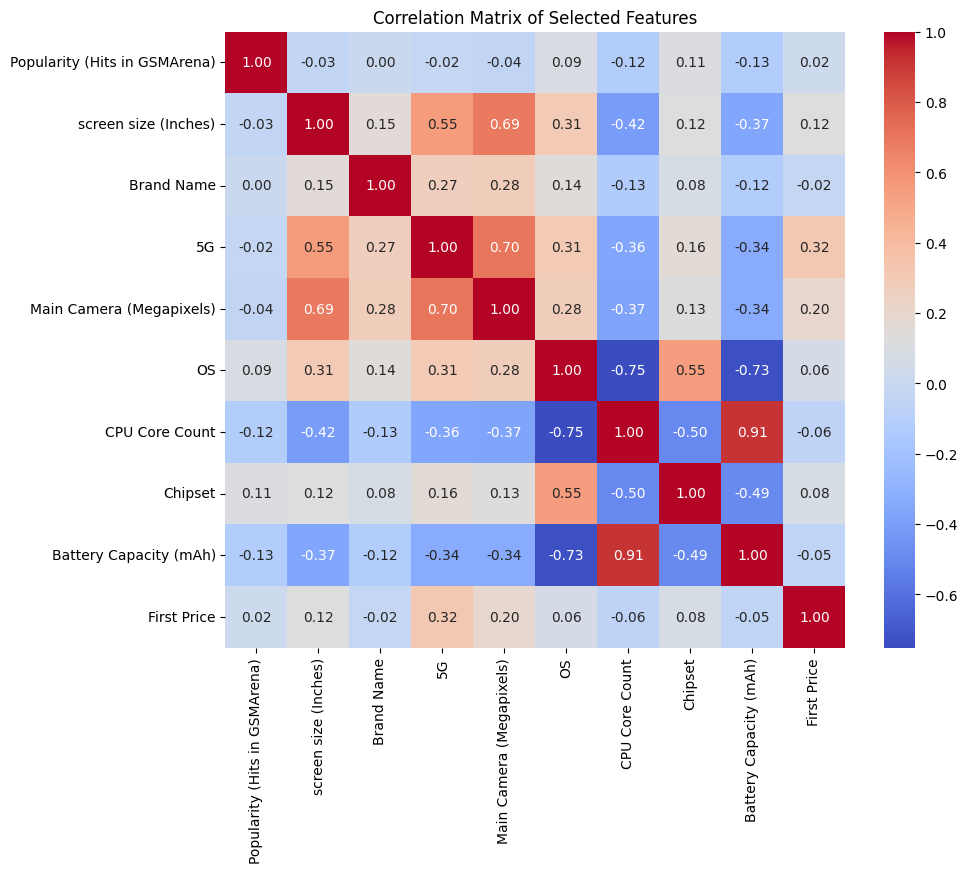

In [ ]:
columns = ['Popularity (Hits in GSMArena)','screen size (Inches)', 'Brand Name', '5G', 'Main Camera (Megapixels)',
                       'OS', 'CPU Core Count', 'Chipset', 'Battery Capacity (mAh)', 'First Price']

df_selected = df[columns]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()

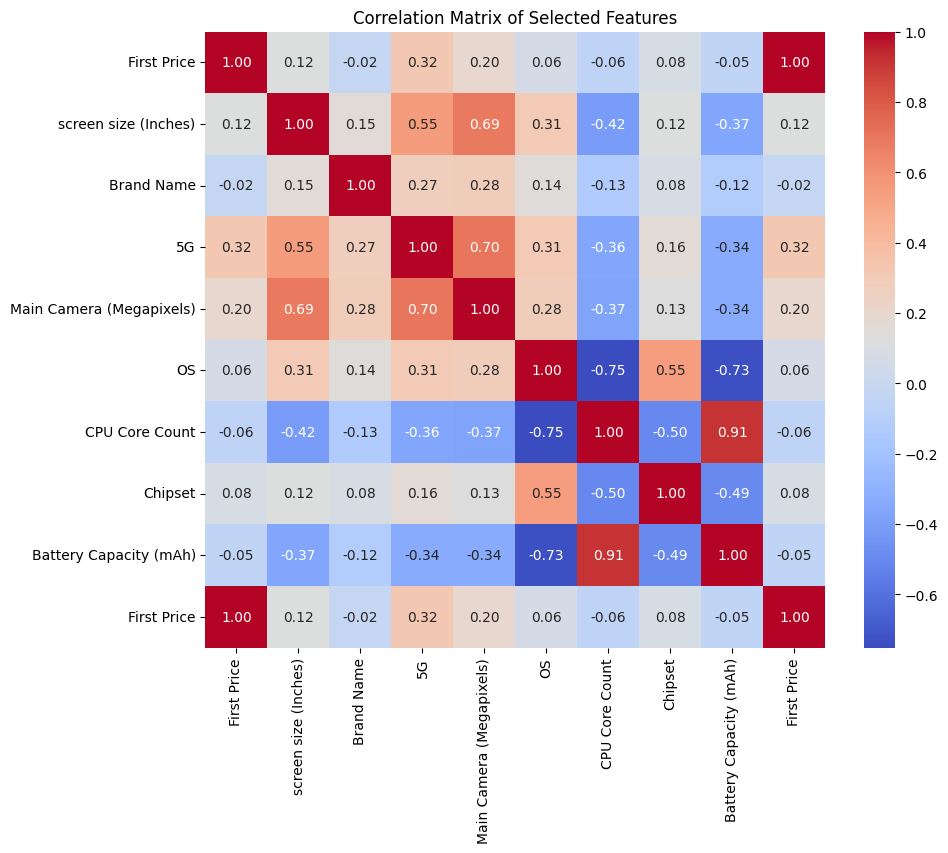

In [ ]:
columns1 = ['First Price','screen size (Inches)', 'Brand Name', '5G', 'Main Camera (Megapixels)',
                       'OS', 'CPU Core Count', 'Chipset', 'Battery Capacity (mAh)', 'First Price']

df_selected = df[columns1]

correlation_matrix = df_selected.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Selected Features')
plt.show()

#Preprocessing for predictive

In [ ]:
df = pd.read_csv('Mobile Prices Final Version.csv')

In [ ]:
non_numeric_features = df.select_dtypes(include=['object']).columns

In [ ]:
label_encoders = {}
for feature in non_numeric_features:
    le = LabelEncoder()
    df[feature] = le.fit_transform(df[feature])
    label_encoders[feature] = le

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2326 entries, 0 to 2325
Data columns (total 75 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Brand Name                     2326 non-null   int64  
 1   Mobile Name                    2326 non-null   int64  
 2   Announced                      2326 non-null   int64  
 3   Length (mm)                    2326 non-null   float64
 4   Width (mm)                     2326 non-null   float64
 5   Depth (mm)                     2326 non-null   float64
 6   Weight (g)                     2326 non-null   float64
 7   2G                             2326 non-null   bool   
 8   3G                             2326 non-null   bool   
 9   4G                             2326 non-null   bool   
 10  5G                             2326 non-null   bool   
 11  Resolution Width (px)          2326 non-null   int64  
 12  Resolution Height (px)         2326 non-null   i

#Predictive

##Feature Selection

RFE

In [ ]:
X = df.drop(columns=['First Price'])
y = df['First Price']

model = LinearRegression()
rfe = RFE(model, n_features_to_select=40)
X_rfe = rfe.fit_transform(X, y)
selected_features_rfe = X.columns[rfe.support_]
print(f'Selected Features by RFE: {selected_features_rfe}')

Selected Features by RFE: Index(['Width (mm)', '3G', '4G', '5G', 'screen size (Inches)',
       'External Memory Support', 'Memory Type', 'Has Speaker',
       'Stereo Speakers', 'Number of Speakers', 'Dolby Atmos',
       'Dedicated Amplifiers', 'Hotspot', 'WiFi Direct', 'DLNA',
       'Has Bluetooth', 'Bluetooth Supports A2DP', 'Bluetooth Supports EDR',
       'Bluetooth Supports aptX', 'Has GPS', 'Supports A-GPS',
       'GPS Supports GLONASS', 'GPS Supports BDS', 'Has NFC',
       'NFC Payment Capabilities', 'NFC Optional or Conditional', 'Has Radio',
       'Has Sensors', 'Accelerometer', 'Gyro', 'Proximity', 'Compass',
       'Fingerprint Sensor', 'Barometer', 'Face ID', 'Iris Scanner',
       'Battery Removability', 'Supports Wireless Charging', 'Supports_eSIM',
       'Screen_to_Body_Ratio'],
      dtype='object')


Select from model

In [ ]:
model = RandomForestRegressor()
sfm = SelectFromModel(model, threshold="mean")
sfm.fit(X, y)
X_sfm = sfm.transform(X)
selected_features_sfm = X.columns[sfm.get_support()]
print(f'Selected Features by SelectFromModel: {selected_features_sfm}')

Selected Features by SelectFromModel: Index(['Brand Name', 'Mobile Name', 'Length (mm)', 'Width (mm)', 'Depth (mm)',
       'Weight (g)', 'Resolution Width (px)', 'Resolution Height (px)', 'PPI',
       'screen size (Inches)', 'Main Camera (Megapixels)', 'Area_cm2'],
      dtype='object')


In [ ]:
model = RandomForestRegressor()
sfm = SelectFromModel(model, threshold=0.01)
sfm.fit(X, y)
X_sfm = sfm.transform(X)
selected_features_sfm = X.columns[sfm.get_support()]
print(f'Selected Features by SelectFromModel: {selected_features_sfm}')

Selected Features by SelectFromModel: Index(['Brand Name', 'Mobile Name', 'Announced', 'Length (mm)', 'Width (mm)',
       'Depth (mm)', 'Weight (g)', 'Resolution Width (px)',
       'Resolution Height (px)', 'PPI', 'screen size (Inches)',
       'Main Camera (Megapixels)', 'Area_cm2'],
      dtype='object')


##Models

Linear Regression

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sfm, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MAE: {mae_lr}, R²: {r2_lr}')

Linear Regression MAE: 149.47910196924673, R²: 0.45501799623008254


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred_lr = model.predict(X_test)

mae_lr_rfe = mean_absolute_error(y_test, y_pred_lr)
r2_lr_rfe = r2_score(y_test, y_pred_lr)
print(f'Linear Regression MAE: {mae_lr}, R²: {r2_lr}')

Linear Regression MAE: 149.47910196924673, R²: 0.45501799623008254


DT

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sfm, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

mae_dt = mean_absolute_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Regression MAE: {mae_dt}, R²: {r2_dt}')

Decision Tree Regression MAE: 102.05251072961374, R²: 0.6235987441868754


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)
model = DecisionTreeRegressor()
model.fit(X_train, y_train)
y_pred_dt = model.predict(X_test)

mae_dt_rfe = mean_absolute_error(y_test, y_pred_dt)
r2_dt_rfe = r2_score(y_test, y_pred_dt)
print(f'Decision Tree Regression MAE: {mae_dt}, R²: {r2_dt}')

Decision Tree Regression MAE: 102.05251072961374, R²: 0.6235987441868754


LSTM

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_sfm, y, test_size=0.2, random_state=42)

X_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(X_lstm, y_train, epochs=500, batch_size=32, verbose=2)

X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_pred_lstm = model.predict(X_test_lstm)

mae_lstm = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm = r2_score(y_test, y_pred_lstm)

print(f'LSTM MAE: {mae_lstm}, R²: {r2_lstm}')

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 - 2s - 37ms/step - loss: 194283.5156
Epoch 2/500
59/59 - 0s - 2ms/step - loss: 93984.6250
Epoch 3/500
59/59 - 0s - 2ms/step - loss: 91281.3828
Epoch 4/500
59/59 - 0s - 2ms/step - loss: 87088.7500
Epoch 5/500
59/59 - 0s - 3ms/step - loss: 83809.1641
Epoch 6/500
59/59 - 0s - 3ms/step - loss: 82544.1484
Epoch 7/500
59/59 - 0s - 2ms/step - loss: 79788.1797
Epoch 8/500
59/59 - 0s - 2ms/step - loss: 78659.6953
Epoch 9/500
59/59 - 0s - 2ms/step - loss: 75473.1875
Epoch 10/500
59/59 - 0s - 2ms/step - loss: 73603.1641
Epoch 11/500
59/59 - 0s - 3ms/step - loss: 72835.8984
Epoch 12/500
59/59 - 0s - 2ms/step - loss: 71673.2812
Epoch 13/500
59/59 - 0s - 3ms/step - loss: 71405.3828
Epoch 14/500
59/59 - 0s - 2ms/step - loss: 69147.2969
Epoch 15/500
59/59 - 0s - 3ms/step - loss: 68657.3594
Epoch 16/500
59/59 - 0s - 2ms/step - loss: 67760.9531
Epoch 17/500
59/59 - 0s - 3ms/step - loss: 69392.6328
Epoch 18/500
59/59 - 0s - 3ms/step - loss: 67154.5469
Epoch 19/500
59/59 - 0s - 3ms/step - loss: 6528

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_rfe, y, test_size=0.2, random_state=42)

X_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

model.fit(X_lstm, y_train, epochs=500, batch_size=32, verbose=2)

X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

y_pred_lstm = model.predict(X_test_lstm)

mae_lstm_rfe = mean_absolute_error(y_test, y_pred_lstm)
r2_lstm_rfe = r2_score(y_test, y_pred_lstm)

print(f'LSTM MAE: {mae_lstm}, R²: {r2_lstm}')

Epoch 1/500


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


59/59 - 2s - 40ms/step - loss: 228801.5000
Epoch 2/500
59/59 - 0s - 5ms/step - loss: 199345.6250
Epoch 3/500
59/59 - 0s - 5ms/step - loss: 164309.6250
Epoch 4/500
59/59 - 0s - 5ms/step - loss: 134634.8438
Epoch 5/500
59/59 - 0s - 4ms/step - loss: 113031.3516
Epoch 6/500
59/59 - 0s - 5ms/step - loss: 102719.2188
Epoch 7/500
59/59 - 0s - 6ms/step - loss: 98598.1406
Epoch 8/500
59/59 - 0s - 8ms/step - loss: 97342.3750
Epoch 9/500
59/59 - 0s - 2ms/step - loss: 96963.1875
Epoch 10/500
59/59 - 0s - 6ms/step - loss: 96823.2344
Epoch 11/500
59/59 - 0s - 5ms/step - loss: 96733.8594
Epoch 12/500
59/59 - 0s - 3ms/step - loss: 96585.4297
Epoch 13/500
59/59 - 0s - 3ms/step - loss: 96476.6953
Epoch 14/500
59/59 - 0s - 2ms/step - loss: 96360.2734
Epoch 15/500
59/59 - 0s - 5ms/step - loss: 96277.2969
Epoch 16/500
59/59 - 0s - 3ms/step - loss: 96138.8281
Epoch 17/500
59/59 - 0s - 3ms/step - loss: 96010.1016
Epoch 18/500
59/59 - 0s - 5ms/step - loss: 95875.7188
Epoch 19/500
59/59 - 0s - 5ms/step - loss:

In [ ]:
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'LSTM'],
    'MAE': [mae_lr, mae_dt, mae_lstm],
    'R²': [r2_lr, r2_dt, r2_lstm],
    'MAE_rfe': [mae_lr_rfe, mae_dt_rfe, mae_lstm_rfe],
    'R²_rfe': [r2_lr_rfe, r2_dt_rfe, r2_lstm_rfe]
})

print(results)

               Model         MAE        R²     MAE_rfe    R²_rfe
0  Linear Regression  149.479102  0.455018  182.006634  0.220735
1      Decision Tree  102.052511  0.623599  157.006513  0.171657
2               LSTM  121.076746  0.626598  168.916598  0.279238


##Findings visualization

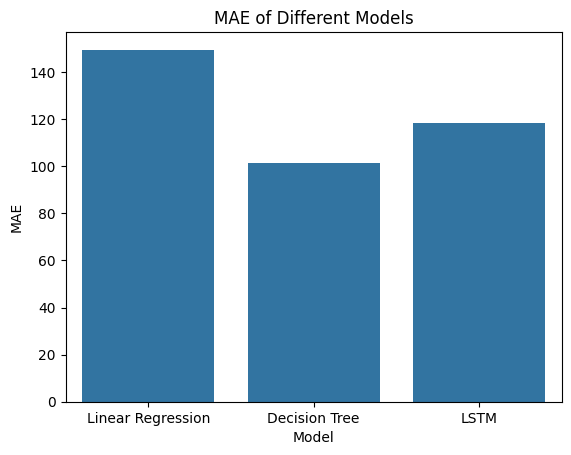

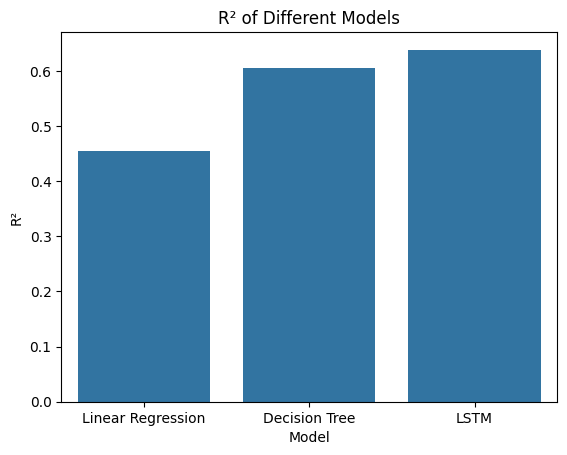

In [ ]:
sns.barplot(x='Model', y='MAE', data=results)
plt.title('MAE of Different Models')
plt.show()

sns.barplot(x='Model', y='R²', data=results)
plt.title('R² of Different Models')
plt.show()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


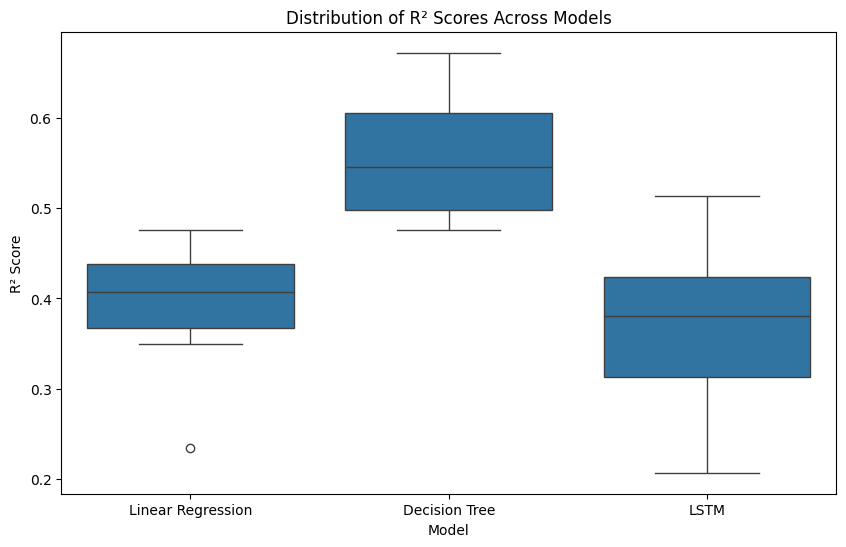

In [ ]:
r2_scores_lr = []
r2_scores_dt = []
r2_scores_lstm = []

n_repeats = 10

for i in range(n_repeats):

    X_train, X_test, y_train, y_test = train_test_split(X_sfm, y, test_size=0.2, random_state=i)

    model_lr = LinearRegression()
    model_lr.fit(X_train, y_train)
    y_pred_lr = model_lr.predict(X_test)
    r2_lr = r2_score(y_test, y_pred_lr)
    r2_scores_lr.append(r2_lr)

    model_dt = DecisionTreeRegressor()
    model_dt.fit(X_train, y_train)
    y_pred_dt = model_dt.predict(X_test)
    r2_dt = r2_score(y_test, y_pred_dt)
    r2_scores_dt.append(r2_dt)

    X_train_lstm = X_train.reshape((X_train.shape[0], 1, X_train.shape[1]))

    model_lstm = Sequential()
    model_lstm.add(LSTM(50, activation='relu', input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
    model_lstm.add(Dense(1))
    model_lstm.compile(optimizer='adam', loss='mse')

    model_lstm.fit(X_train_lstm, y_train, epochs=50, batch_size=32, verbose=0)

    X_test_lstm = X_test.reshape((X_test.shape[0], 1, X_test.shape[1]))

    y_pred_lstm = model_lstm.predict(X_test_lstm).flatten()
    r2_lstm = r2_score(y_test, y_pred_lstm)
    r2_scores_lstm.append(r2_lstm)

results = pd.DataFrame({
    'Model': ['Linear Regression'] * n_repeats + ['Decision Tree'] * n_repeats + ['LSTM'] * n_repeats,
    'R²': r2_scores_lr + r2_scores_dt + r2_scores_lstm
})

plt.figure(figsize=(10, 6))
sns.boxplot(x='Model', y='R²', data=results)
plt.title('Distribution of R² Scores Across Models')
plt.ylabel('R² Score')
plt.show()

#Prescriptive (The prescriptive part was done in an individual code, but here the coeficients were extracted)

In [ ]:
df = pd.read_csv('Mobile Prices Final Version.csv')

In [ ]:
X = df[['screen size (Inches)', 'Battery Capacity (mAh)', 'Main Camera (Megapixels)']]
y = df['Popularity (Hits in GSMArena)']

model = LinearRegression()
model.fit(X, y)

weights = model.coef_

print("Weights for screen size, battery capacity, and camera megapixels are:")
print(f"Screen Size Weight (w1): {weights[0]:.4f}")
print(f"Battery Capacity Weight (w2): {weights[1]:.4f}")
print(f"Camera Megapixels Weight (w3): {weights[2]:.4f}")

Weights for screen size, battery capacity, and camera megapixels are:
Screen Size Weight (w1): -159303.4861
Battery Capacity Weight (w2): -550.0096
Camera Megapixels Weight (w3): -13397.5191
